In [1]:
import skimage
import skimage.io as io
import skimage.feature
import skimage.filters
import skimage.transform
from scipy import ndimage as ndi
from scipy.fft import fft2, fftshift
import numpy as np
import matplotlib.pylab as plt
from skimage.draw import polygon_perimeter


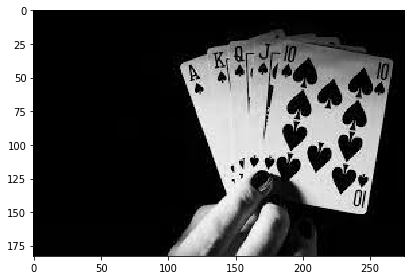

In [112]:
img = io.imread('cards2.png', as_gray=True)
io.imshow(img)

C:\Python310\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


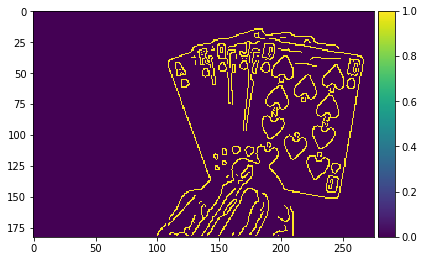

In [113]:
img_canny = skimage.feature.canny(img, sigma=1)
io.imshow(img_canny  + 0)

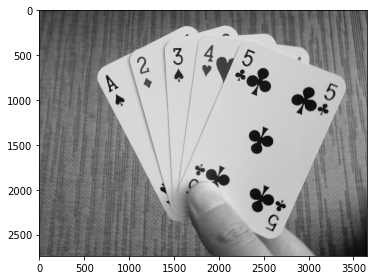

In [77]:
io.imshow(img + 0.0)
img1 = img > 0.8

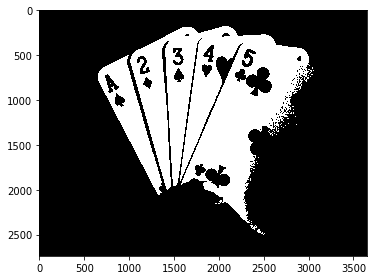

In [78]:
io.imshow(img1 + 0.0)

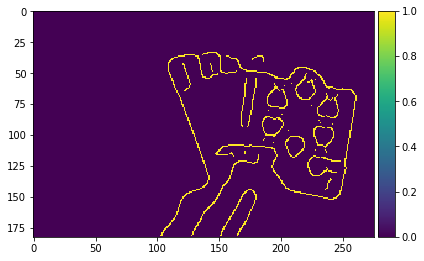

In [116]:
img_canny = skimage.feature.canny(img1, sigma=4)
io.imshow(img_canny  + 0)

In [117]:
countours = skimage.measure.find_contours(img1)
print(countours[0].shape)

(5, 2)


In [108]:
import matplotlib.pylab as plt

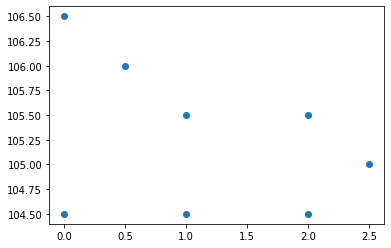

In [109]:
plt.scatter(countours[5][:, 0], countours[5][:, 1])

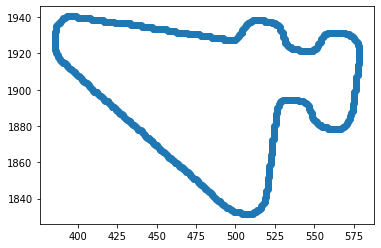

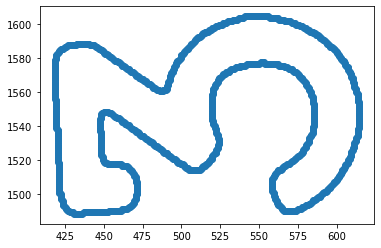

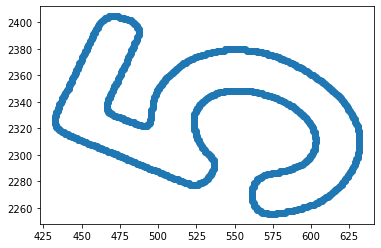

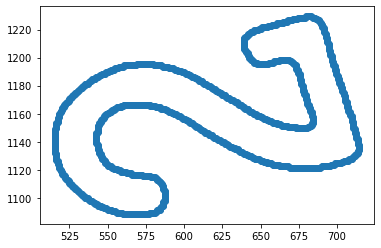

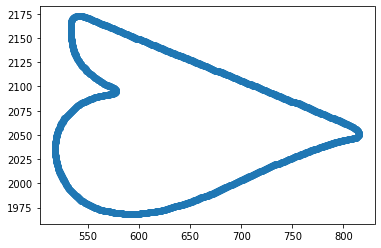

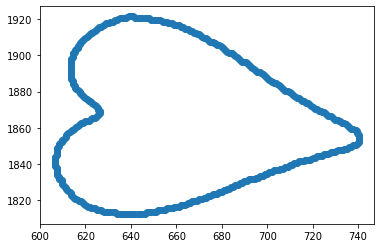

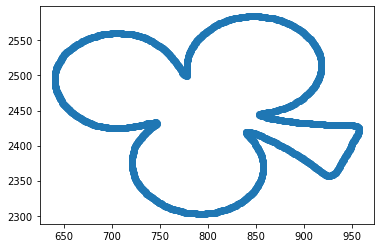

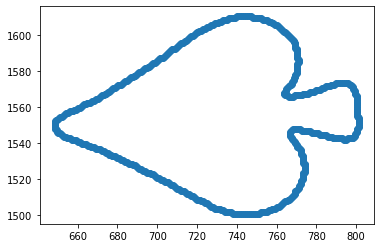

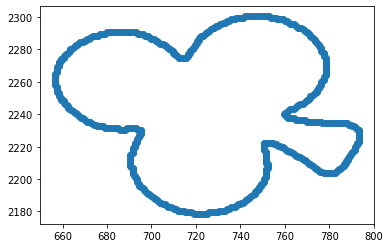

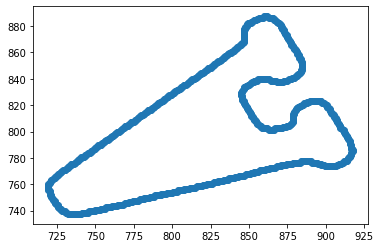

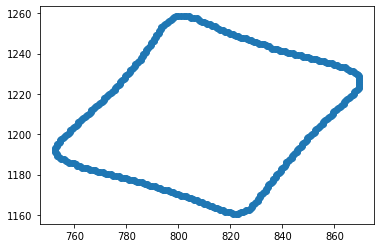

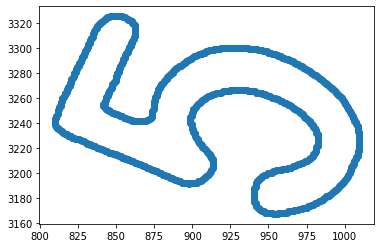

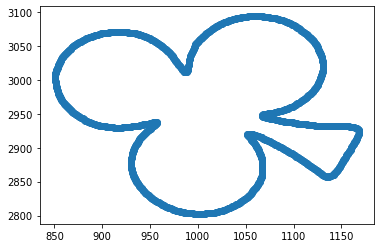

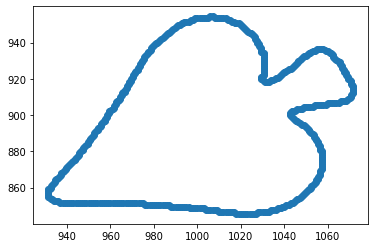

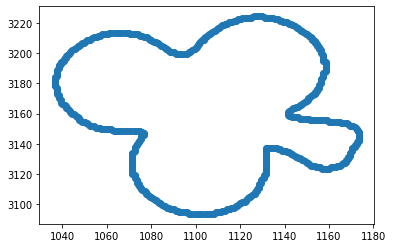

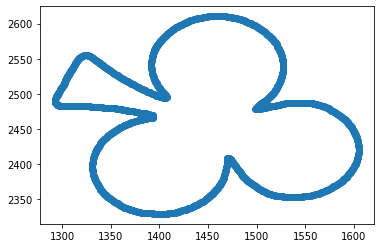

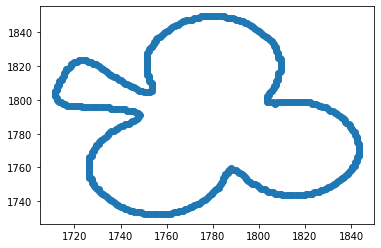

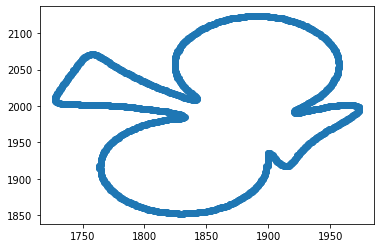

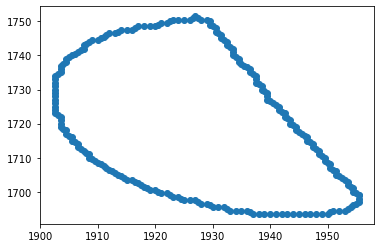

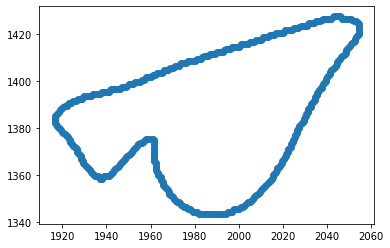

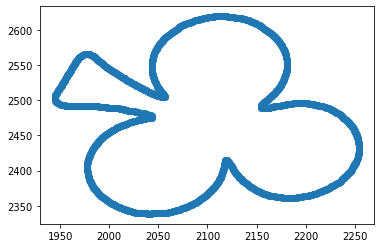

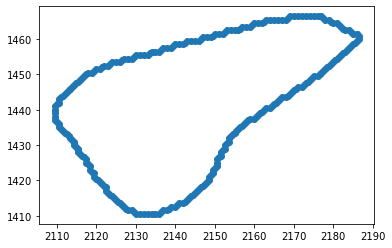

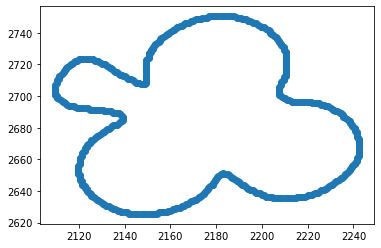

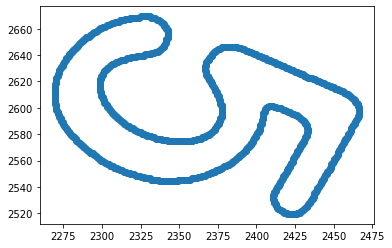

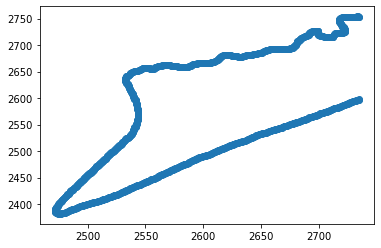

In [108]:
#i = 0
#Arr = [ 'H', '4', '3', '5', '2', 'D', 'H', 'C', 'S', 'C', 'A', 'D', 'S', 'J', 'C', 'C', 'J', 'D']

for countour in countours:
    if max(countour[:,0]) - min(countour[:,0]) > img.shape[0]/75 and \
    max(countour[:,1]) - min(countour[:,1]) > img.shape[1]/75 and \
    max(countour[:,0]) - min(countour[:,0]) < img.shape[0]/5 and \
    max(countour[:,1]) - min(countour[:,1]) < img.shape[1]/5:
        plt.scatter(countour[:, 0], countour[:, 1])
        plt.show()
        #print("('{}',{},{}),".format(Arr[i], (max(countour[:,0]) + min(countour[:,0]))/2, (max(countour[:,1]) + min(countour[:,1]))/2))
        #i = i + 1

    # H, 4, 3, 5, 2, D, H, C, S, C, A, D, S, J, C, C, J, D

In [83]:
countours[0][:, 0]

array([625.5, 625.5, 625.5, ..., 624.5, 625. , 625.5])

In [84]:
len(countours)

18

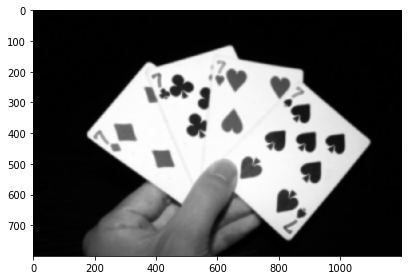

In [54]:
dilated = skimage.morphology.erosion(skimage.morphology.erosion(img))
io.imshow(dilated + 0.0)

In [86]:
hog = skimage.feature.hog(dilated + 0)
print(len(hog))

585225


In [87]:
img.shape

(700, 700)

In [88]:
from skimage import segmentation

In [89]:
seg = segmentation.chan_vese(dilated+ 0)

KeyboardInterrupt: 

In [86]:
from skimage.filters import threshold_otsu
def segmentation(img):
    th = threshold_otsu(img)
    img1 = img > th
    return img1 + 0.0


In [87]:
def contour_detection(img):
    return skimage.measure.find_contours(img)

In [100]:
def errosion(img):
    return skimage.morphology.erosion(img) + 0.0

In [96]:
def dilation(img):
    return skimage.morphology.dilation(img) + 0.0

In [3]:
def read_img(path):
    return io.imread(path, as_gray=True)

In [9]:
def region_based_segmentation(img):
    elevation_map = skimage.filters.sobel(img)
    
    # Finding Markers:
    markers = np.zeros_like(img)
    markers[img < 30] = 1
    markers[img > 150] = 2
    
    # Filling the gaps:
    segmentation = skimage.morphology.watershed(elevation_map, markers)
    
    # Segment and Label Indvidually
    segmentation = ndi.binary_fill_holes(segmentation - 1)
    labeled_coins, _ = ndi.label(segmentation)
    image_label_overlay = skimage.color.label2rgb(labeled_coins, image=img)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), sharex=True, sharey=True)
    ax1.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
    ax1.contour(segmentation, [0.5], linewidths=1.2, colors='y')
    ax1.axis('off')
    ax2.imshow(image_label_overlay, interpolation='nearest')
    ax2.axis('off')
    #ax2.set_adjustable('box-forced')
    
    return image_label_overlay

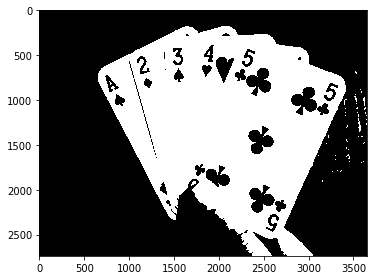

In [107]:
img = read_img(path='./AcetoFive.jpeg')
img = errosion(img)
img = errosion(img)
img = errosion(img)
img = skimage.filters.gaussian(img, sigma=3)
segm = segmentation(img)
io.imshow(segm + 0.0)
countours = contour_detection(segm)
#img_new = region_based_segmentation(img)

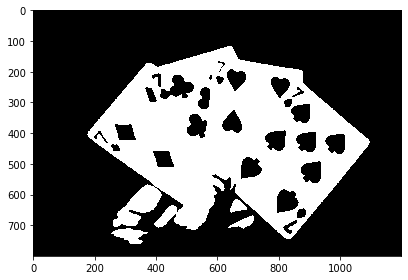

In [ ]:
def draw_bbox(img, contours):
    bounding_boxes = []

    for contour in contours:
        Xmin = np.min(contour[:,0])
        Xmax = np.max(contour[:,0])
        Ymin = np.min(contour[:,1])
        Ymax = np.max(contour[:,1])

        bounding_boxes.append([Xmin, Xmax, Ymin, Ymax])


    with_boxes  = np.copy(img)

    for box in bounding_boxes:
        #[Xmin, Xmax, Ymin, Ymax]
        print(box)
        r = [box[0],box[1],box[1],box[0], box[0]]
        c = [box[3],box[3],box[2],box[2], box[3]]
        rr, cc = polygon_perimeter(r, c, with_boxes.shape)
        with_boxes[rr, cc] = 0.6 #set color white

    plt.imshow(with_boxes, interpolation='nearest', cmap=plt.cm.gray)
    plt.show()
    return with_boxes, bounding_boxes


[172.5, 2735.0, 648.5, 3414.5]


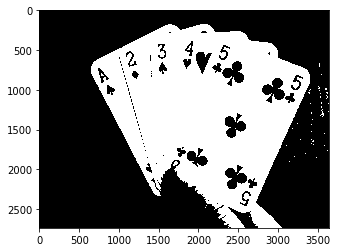

In [ ]:
bbox_img, bounding_boxes = draw_bbox(img1, [countours[1]])

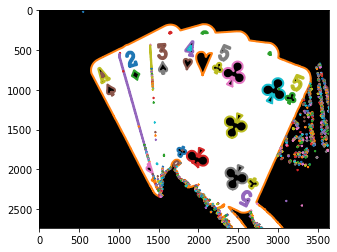

In [ ]:
contours = skimage.measure.find_contours(img1)

fig, ax = plt.subplots()
ax.imshow(img1, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    if n == len(countours) - 1:
        break
    if len(countours[n]) > 0:
        ax.plot(contours[n][:, 1], contours[n][:, 0], linewidth=2)

plt.show()

In [ ]:
len(countours[5])

1037

In [ ]:
len(countours)

1404

In [73]:
img1 = read_img('./AcetoFive.jpeg')

In [ ]:
print(bbox_img)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [ ]:
x_min, x_max, y_min, y_max = bounding_boxes[0]

In [ ]:
imgRect = img1[int(x_min): int(x_max), int(y_min) : int(y_max)]

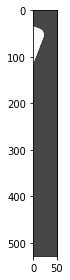

In [ ]:
io.imshow(imgRect)

In [ ]:
!pip install emnist

In [ ]:
from emnist import extract_training_samples
images, labels = extract_training_samples('letters')


In [ ]:
images[0].shape

(28, 28)

In [ ]:
imgRect.shape

(528, 52)

In [ ]:
from skimage.transform import rescale, resize, downscale_local_mean
image_resized = resize(imgRect, (28, 28),
                       anti_aliasing=True)

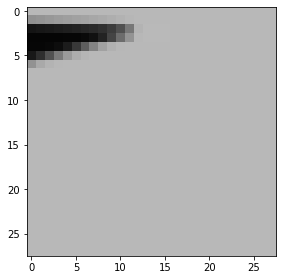

In [ ]:
io.imshow(1-image_resized)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline

sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(images.reshape(images.shape[0], -1), labels)

KeyboardInterrupt: 

In [ ]:
sgd_clf.predict((1-image_resized).reshape(1, 28*28))

array([12], dtype=uint8)

In [ ]:
for i, label in enumerate(labels):
    print(f'for {i} label is {label}')

for 0 label is 23
for 1 label is 7
for 2 label is 16
for 3 label is 15
for 4 label is 23
for 5 label is 17
for 6 label is 13
for 7 label is 11
for 8 label is 22
for 9 label is 24
for 10 label is 10
for 11 label is 14
for 12 label is 18
for 13 label is 21
for 14 label is 26
for 15 label is 21
for 16 label is 21
for 17 label is 24
for 18 label is 19
for 19 label is 5
for 20 label is 2
for 21 label is 25
for 22 label is 9
for 23 label is 5
for 24 label is 10
for 25 label is 21
for 26 label is 11
for 27 label is 24
for 28 label is 12
for 29 label is 1
for 30 label is 17
for 31 label is 9
for 32 label is 1
for 33 label is 24
for 34 label is 18
for 35 label is 1
for 36 label is 8
for 37 label is 4
for 38 label is 1
for 39 label is 9
for 40 label is 7
for 41 label is 21
for 42 label is 3
for 43 label is 16
for 44 label is 2
for 45 label is 20
for 46 label is 10
for 47 label is 12
for 48 label is 11
for 49 label is 20
for 50 label is 3
for 51 label is 6
for 52 label is 13
for 53 label is 15
fo

for 1564 label is 20
for 1565 label is 6
for 1566 label is 10
for 1567 label is 3
for 1568 label is 12
for 1569 label is 12
for 1570 label is 18
for 1571 label is 21
for 1572 label is 5
for 1573 label is 20
for 1574 label is 24
for 1575 label is 17
for 1576 label is 15
for 1577 label is 23
for 1578 label is 9
for 1579 label is 17
for 1580 label is 18
for 1581 label is 24
for 1582 label is 18
for 1583 label is 3
for 1584 label is 4
for 1585 label is 7
for 1586 label is 12
for 1587 label is 3
for 1588 label is 17
for 1589 label is 7
for 1590 label is 22
for 1591 label is 25
for 1592 label is 8
for 1593 label is 12
for 1594 label is 14
for 1595 label is 25
for 1596 label is 23
for 1597 label is 15
for 1598 label is 9
for 1599 label is 20
for 1600 label is 20
for 1601 label is 8
for 1602 label is 22
for 1603 label is 24
for 1604 label is 25
for 1605 label is 20
for 1606 label is 14
for 1607 label is 5
for 1608 label is 13
for 1609 label is 8
for 1610 label is 18
for 1611 label is 15
for 16

for 3064 label is 13
for 3065 label is 5
for 3066 label is 6
for 3067 label is 21
for 3068 label is 16
for 3069 label is 10
for 3070 label is 3
for 3071 label is 24
for 3072 label is 26
for 3073 label is 7
for 3074 label is 22
for 3075 label is 4
for 3076 label is 2
for 3077 label is 22
for 3078 label is 12
for 3079 label is 6
for 3080 label is 6
for 3081 label is 26
for 3082 label is 4
for 3083 label is 5
for 3084 label is 24
for 3085 label is 3
for 3086 label is 7
for 3087 label is 19
for 3088 label is 22
for 3089 label is 18
for 3090 label is 23
for 3091 label is 13
for 3092 label is 8
for 3093 label is 10
for 3094 label is 1
for 3095 label is 18
for 3096 label is 20
for 3097 label is 4
for 3098 label is 14
for 3099 label is 11
for 3100 label is 10
for 3101 label is 26
for 3102 label is 26
for 3103 label is 18
for 3104 label is 5
for 3105 label is 10
for 3106 label is 16
for 3107 label is 26
for 3108 label is 5
for 3109 label is 2
for 3110 label is 21
for 3111 label is 26
for 3112 l

for 4563 label is 18
for 4564 label is 9
for 4565 label is 16
for 4566 label is 24
for 4567 label is 14
for 4568 label is 4
for 4569 label is 15
for 4570 label is 16
for 4571 label is 5
for 4572 label is 19
for 4573 label is 10
for 4574 label is 14
for 4575 label is 14
for 4576 label is 18
for 4577 label is 19
for 4578 label is 10
for 4579 label is 21
for 4580 label is 26
for 4581 label is 22
for 4582 label is 25
for 4583 label is 24
for 4584 label is 19
for 4585 label is 12
for 4586 label is 13
for 4587 label is 20
for 4588 label is 7
for 4589 label is 1
for 4590 label is 11
for 4591 label is 17
for 4592 label is 12
for 4593 label is 17
for 4594 label is 10
for 4595 label is 8
for 4596 label is 11
for 4597 label is 17
for 4598 label is 11
for 4599 label is 26
for 4600 label is 6
for 4601 label is 3
for 4602 label is 11
for 4603 label is 5
for 4604 label is 17
for 4605 label is 2
for 4606 label is 11
for 4607 label is 25
for 4608 label is 20
for 4609 label is 19
for 4610 label is 1
for

for 6063 label is 16
for 6064 label is 20
for 6065 label is 24
for 6066 label is 9
for 6067 label is 17
for 6068 label is 12
for 6069 label is 23
for 6070 label is 3
for 6071 label is 1
for 6072 label is 8
for 6073 label is 22
for 6074 label is 17
for 6075 label is 13
for 6076 label is 8
for 6077 label is 1
for 6078 label is 3
for 6079 label is 7
for 6080 label is 2
for 6081 label is 13
for 6082 label is 8
for 6083 label is 16
for 6084 label is 6
for 6085 label is 4
for 6086 label is 26
for 6087 label is 17
for 6088 label is 2
for 6089 label is 17
for 6090 label is 12
for 6091 label is 23
for 6092 label is 5
for 6093 label is 6
for 6094 label is 2
for 6095 label is 13
for 6096 label is 12
for 6097 label is 4
for 6098 label is 5
for 6099 label is 12
for 6100 label is 10
for 6101 label is 9
for 6102 label is 8
for 6103 label is 22
for 6104 label is 24
for 6105 label is 3
for 6106 label is 24
for 6107 label is 14
for 6108 label is 9
for 6109 label is 25
for 6110 label is 2
for 6111 label 

for 7062 label is 25
for 7063 label is 23
for 7064 label is 15
for 7065 label is 20
for 7066 label is 26
for 7067 label is 7
for 7068 label is 1
for 7069 label is 17
for 7070 label is 18
for 7071 label is 11
for 7072 label is 6
for 7073 label is 16
for 7074 label is 23
for 7075 label is 6
for 7076 label is 15
for 7077 label is 12
for 7078 label is 9
for 7079 label is 10
for 7080 label is 22
for 7081 label is 5
for 7082 label is 25
for 7083 label is 12
for 7084 label is 23
for 7085 label is 3
for 7086 label is 20
for 7087 label is 7
for 7088 label is 9
for 7089 label is 21
for 7090 label is 17
for 7091 label is 22
for 7092 label is 8
for 7093 label is 16
for 7094 label is 16
for 7095 label is 19
for 7096 label is 22
for 7097 label is 13
for 7098 label is 10
for 7099 label is 19
for 7100 label is 8
for 7101 label is 25
for 7102 label is 15
for 7103 label is 15
for 7104 label is 16
for 7105 label is 7
for 7106 label is 17
for 7107 label is 17
for 7108 label is 23
for 7109 label is 1
for 7

for 8562 label is 7
for 8563 label is 13
for 8564 label is 25
for 8565 label is 7
for 8566 label is 25
for 8567 label is 12
for 8568 label is 24
for 8569 label is 26
for 8570 label is 26
for 8571 label is 1
for 8572 label is 11
for 8573 label is 25
for 8574 label is 1
for 8575 label is 6
for 8576 label is 15
for 8577 label is 12
for 8578 label is 6
for 8579 label is 6
for 8580 label is 5
for 8581 label is 22
for 8582 label is 17
for 8583 label is 1
for 8584 label is 15
for 8585 label is 2
for 8586 label is 24
for 8587 label is 14
for 8588 label is 6
for 8589 label is 7
for 8590 label is 15
for 8591 label is 11
for 8592 label is 26
for 8593 label is 19
for 8594 label is 26
for 8595 label is 8
for 8596 label is 7
for 8597 label is 25
for 8598 label is 10
for 8599 label is 20
for 8600 label is 18
for 8601 label is 11
for 8602 label is 17
for 8603 label is 23
for 8604 label is 24
for 8605 label is 15
for 8606 label is 11
for 8607 label is 25
for 8608 label is 1
for 8609 label is 18
for 861

for 9561 label is 16
for 9562 label is 1
for 9563 label is 8
for 9564 label is 11
for 9565 label is 24
for 9566 label is 15
for 9567 label is 7
for 9568 label is 19
for 9569 label is 17
for 9570 label is 22
for 9571 label is 19
for 9572 label is 10
for 9573 label is 22
for 9574 label is 9
for 9575 label is 26
for 9576 label is 22
for 9577 label is 13
for 9578 label is 25
for 9579 label is 25
for 9580 label is 9
for 9581 label is 10
for 9582 label is 2
for 9583 label is 26
for 9584 label is 24
for 9585 label is 20
for 9586 label is 23
for 9587 label is 13
for 9588 label is 23
for 9589 label is 5
for 9590 label is 21
for 9591 label is 9
for 9592 label is 25
for 9593 label is 22
for 9594 label is 9
for 9595 label is 22
for 9596 label is 21
for 9597 label is 3
for 9598 label is 24
for 9599 label is 5
for 9600 label is 14
for 9601 label is 13
for 9602 label is 23
for 9603 label is 1
for 9604 label is 19
for 9605 label is 23
for 9606 label is 15
for 9607 label is 24
for 9608 label is 5
for 9

for 11061 label is 21
for 11062 label is 10
for 11063 label is 10
for 11064 label is 15
for 11065 label is 14
for 11066 label is 24
for 11067 label is 25
for 11068 label is 3
for 11069 label is 13
for 11070 label is 24
for 11071 label is 25
for 11072 label is 25
for 11073 label is 16
for 11074 label is 11
for 11075 label is 21
for 11076 label is 25
for 11077 label is 2
for 11078 label is 6
for 11079 label is 22
for 11080 label is 4
for 11081 label is 24
for 11082 label is 26
for 11083 label is 21
for 11084 label is 13
for 11085 label is 26
for 11086 label is 14
for 11087 label is 15
for 11088 label is 6
for 11089 label is 3
for 11090 label is 17
for 11091 label is 21
for 11092 label is 1
for 11093 label is 1
for 11094 label is 25
for 11095 label is 12
for 11096 label is 12
for 11097 label is 7
for 11098 label is 20
for 11099 label is 11
for 11100 label is 17
for 11101 label is 23
for 11102 label is 26
for 11103 label is 1
for 11104 label is 13
for 11105 label is 24
for 11106 label is 9

for 12560 label is 20
for 12561 label is 20
for 12562 label is 17
for 12563 label is 17
for 12564 label is 24
for 12565 label is 24
for 12566 label is 18
for 12567 label is 3
for 12568 label is 6
for 12569 label is 5
for 12570 label is 25
for 12571 label is 15
for 12572 label is 7
for 12573 label is 20
for 12574 label is 25
for 12575 label is 19
for 12576 label is 18
for 12577 label is 18
for 12578 label is 10
for 12579 label is 17
for 12580 label is 1
for 12581 label is 22
for 12582 label is 11
for 12583 label is 16
for 12584 label is 8
for 12585 label is 2
for 12586 label is 10
for 12587 label is 4
for 12588 label is 10
for 12589 label is 16
for 12590 label is 3
for 12591 label is 25
for 12592 label is 14
for 12593 label is 10
for 12594 label is 23
for 12595 label is 11
for 12596 label is 6
for 12597 label is 19
for 12598 label is 5
for 12599 label is 13
for 12600 label is 22
for 12601 label is 20
for 12602 label is 23
for 12603 label is 18
for 12604 label is 20
for 12605 label is 7


for 14060 label is 26
for 14061 label is 6
for 14062 label is 20
for 14063 label is 17
for 14064 label is 12
for 14065 label is 25
for 14066 label is 11
for 14067 label is 15
for 14068 label is 23
for 14069 label is 5
for 14070 label is 4
for 14071 label is 6
for 14072 label is 1
for 14073 label is 25
for 14074 label is 11
for 14075 label is 24
for 14076 label is 21
for 14077 label is 12
for 14078 label is 12
for 14079 label is 9
for 14080 label is 7
for 14081 label is 2
for 14082 label is 2
for 14083 label is 5
for 14084 label is 6
for 14085 label is 15
for 14086 label is 20
for 14087 label is 4
for 14088 label is 16
for 14089 label is 21
for 14090 label is 26
for 14091 label is 1
for 14092 label is 24
for 14093 label is 16
for 14094 label is 26
for 14095 label is 22
for 14096 label is 10
for 14097 label is 3
for 14098 label is 2
for 14099 label is 15
for 14100 label is 22
for 14101 label is 14
for 14102 label is 2
for 14103 label is 13
for 14104 label is 6
for 14105 label is 3
for 14

for 15559 label is 21
for 15560 label is 19
for 15561 label is 24
for 15562 label is 4
for 15563 label is 11
for 15564 label is 17
for 15565 label is 17
for 15566 label is 12
for 15567 label is 6
for 15568 label is 1
for 15569 label is 1
for 15570 label is 13
for 15571 label is 11
for 15572 label is 22
for 15573 label is 23
for 15574 label is 18
for 15575 label is 5
for 15576 label is 6
for 15577 label is 20
for 15578 label is 3
for 15579 label is 18
for 15580 label is 3
for 15581 label is 18
for 15582 label is 20
for 15583 label is 16
for 15584 label is 21
for 15585 label is 12
for 15586 label is 24
for 15587 label is 9
for 15588 label is 7
for 15589 label is 7
for 15590 label is 15
for 15591 label is 10
for 15592 label is 22
for 15593 label is 7
for 15594 label is 12
for 15595 label is 6
for 15596 label is 14
for 15597 label is 24
for 15598 label is 18
for 15599 label is 5
for 15600 label is 1
for 15601 label is 21
for 15602 label is 20
for 15603 label is 1
for 15604 label is 11
for 

for 17059 label is 26
for 17060 label is 26
for 17061 label is 14
for 17062 label is 8
for 17063 label is 2
for 17064 label is 13
for 17065 label is 4
for 17066 label is 7
for 17067 label is 2
for 17068 label is 14
for 17069 label is 4
for 17070 label is 5
for 17071 label is 16
for 17072 label is 20
for 17073 label is 20
for 17074 label is 2
for 17075 label is 17
for 17076 label is 24
for 17077 label is 8
for 17078 label is 12
for 17079 label is 26
for 17080 label is 1
for 17081 label is 9
for 17082 label is 17
for 17083 label is 16
for 17084 label is 11
for 17085 label is 3
for 17086 label is 18
for 17087 label is 13
for 17088 label is 8
for 17089 label is 11
for 17090 label is 14
for 17091 label is 5
for 17092 label is 18
for 17093 label is 20
for 17094 label is 11
for 17095 label is 1
for 17096 label is 3
for 17097 label is 5
for 17098 label is 6
for 17099 label is 26
for 17100 label is 21
for 17101 label is 16
for 17102 label is 22
for 17103 label is 8
for 17104 label is 1
for 1710

for 18558 label is 6
for 18559 label is 4
for 18560 label is 18
for 18561 label is 25
for 18562 label is 26
for 18563 label is 2
for 18564 label is 26
for 18565 label is 24
for 18566 label is 10
for 18567 label is 11
for 18568 label is 14
for 18569 label is 14
for 18570 label is 11
for 18571 label is 3
for 18572 label is 13
for 18573 label is 21
for 18574 label is 12
for 18575 label is 4
for 18576 label is 14
for 18577 label is 21
for 18578 label is 10
for 18579 label is 14
for 18580 label is 8
for 18581 label is 21
for 18582 label is 17
for 18583 label is 9
for 18584 label is 25
for 18585 label is 2
for 18586 label is 26
for 18587 label is 7
for 18588 label is 18
for 18589 label is 25
for 18590 label is 4
for 18591 label is 9
for 18592 label is 23
for 18593 label is 12
for 18594 label is 25
for 18595 label is 21
for 18596 label is 6
for 18597 label is 25
for 18598 label is 8
for 18599 label is 15
for 18600 label is 18
for 18601 label is 26
for 18602 label is 7
for 18603 label is 8
for

for 20058 label is 8
for 20059 label is 10
for 20060 label is 8
for 20061 label is 19
for 20062 label is 5
for 20063 label is 21
for 20064 label is 23
for 20065 label is 24
for 20066 label is 1
for 20067 label is 17
for 20068 label is 19
for 20069 label is 3
for 20070 label is 24
for 20071 label is 11
for 20072 label is 26
for 20073 label is 12
for 20074 label is 26
for 20075 label is 12
for 20076 label is 23
for 20077 label is 21
for 20078 label is 16
for 20079 label is 2
for 20080 label is 1
for 20081 label is 2
for 20082 label is 20
for 20083 label is 3
for 20084 label is 8
for 20085 label is 26
for 20086 label is 2
for 20087 label is 26
for 20088 label is 15
for 20089 label is 20
for 20090 label is 20
for 20091 label is 16
for 20092 label is 26
for 20093 label is 21
for 20094 label is 25
for 20095 label is 23
for 20096 label is 12
for 20097 label is 15
for 20098 label is 7
for 20099 label is 14
for 20100 label is 10
for 20101 label is 8
for 20102 label is 24
for 20103 label is 6
fo

for 21557 label is 1
for 21558 label is 15
for 21559 label is 25
for 21560 label is 16
for 21561 label is 19
for 21562 label is 7
for 21563 label is 3
for 21564 label is 10
for 21565 label is 9
for 21566 label is 1
for 21567 label is 15
for 21568 label is 5
for 21569 label is 18
for 21570 label is 20
for 21571 label is 25
for 21572 label is 23
for 21573 label is 13
for 21574 label is 10
for 21575 label is 7
for 21576 label is 7
for 21577 label is 18
for 21578 label is 6
for 21579 label is 10
for 21580 label is 1
for 21581 label is 3
for 21582 label is 1
for 21583 label is 5
for 21584 label is 10
for 21585 label is 10
for 21586 label is 5
for 21587 label is 1
for 21588 label is 22
for 21589 label is 4
for 21590 label is 21
for 21591 label is 18
for 21592 label is 15
for 21593 label is 17
for 21594 label is 12
for 21595 label is 25
for 21596 label is 23
for 21597 label is 15
for 21598 label is 1
for 21599 label is 14
for 21600 label is 15
for 21601 label is 3
for 21602 label is 23
for 21

for 23046 label is 16
for 23047 label is 5
for 23048 label is 7
for 23049 label is 19
for 23050 label is 12
for 23051 label is 24
for 23052 label is 9
for 23053 label is 14
for 23054 label is 4
for 23055 label is 26
for 23056 label is 18
for 23057 label is 7
for 23058 label is 2
for 23059 label is 18
for 23060 label is 2
for 23061 label is 7
for 23062 label is 13
for 23063 label is 12
for 23064 label is 15
for 23065 label is 3
for 23066 label is 5
for 23067 label is 6
for 23068 label is 19
for 23069 label is 9
for 23070 label is 16
for 23071 label is 20
for 23072 label is 1
for 23073 label is 26
for 23074 label is 21
for 23075 label is 13
for 23076 label is 8
for 23077 label is 20
for 23078 label is 9
for 23079 label is 4
for 23080 label is 7
for 23081 label is 12
for 23082 label is 2
for 23083 label is 4
for 23084 label is 24
for 23085 label is 2
for 23086 label is 12
for 23087 label is 19
for 23088 label is 23
for 23089 label is 22
for 23090 label is 11
for 23091 label is 2
for 23092

for 24341 label is 6
for 24342 label is 12
for 24343 label is 1
for 24344 label is 15
for 24345 label is 25
for 24346 label is 26
for 24347 label is 7
for 24348 label is 9
for 24349 label is 16
for 24350 label is 1
for 24351 label is 23
for 24352 label is 8
for 24353 label is 7
for 24354 label is 23
for 24355 label is 19
for 24356 label is 5
for 24357 label is 7
for 24358 label is 16
for 24359 label is 11
for 24360 label is 4
for 24361 label is 24
for 24362 label is 13
for 24363 label is 6
for 24364 label is 19
for 24365 label is 12
for 24366 label is 16
for 24367 label is 24
for 24368 label is 5
for 24369 label is 6
for 24370 label is 1
for 24371 label is 12
for 24372 label is 4
for 24373 label is 6
for 24374 label is 3
for 24375 label is 25
for 24376 label is 2
for 24377 label is 5
for 24378 label is 2
for 24379 label is 15
for 24380 label is 9
for 24381 label is 13
for 24382 label is 11
for 24383 label is 8
for 24384 label is 3
for 24385 label is 11
for 24386 label is 13
for 24387 l

for 25556 label is 11
for 25557 label is 4
for 25558 label is 18
for 25559 label is 2
for 25560 label is 11
for 25561 label is 3
for 25562 label is 11
for 25563 label is 16
for 25564 label is 22
for 25565 label is 24
for 25566 label is 7
for 25567 label is 21
for 25568 label is 6
for 25569 label is 24
for 25570 label is 5
for 25571 label is 26
for 25572 label is 13
for 25573 label is 15
for 25574 label is 12
for 25575 label is 20
for 25576 label is 17
for 25577 label is 22
for 25578 label is 24
for 25579 label is 8
for 25580 label is 4
for 25581 label is 4
for 25582 label is 16
for 25583 label is 15
for 25584 label is 10
for 25585 label is 25
for 25586 label is 7
for 25587 label is 21
for 25588 label is 16
for 25589 label is 16
for 25590 label is 24
for 25591 label is 26
for 25592 label is 12
for 25593 label is 9
for 25594 label is 13
for 25595 label is 18
for 25596 label is 20
for 25597 label is 14
for 25598 label is 8
for 25599 label is 7
for 25600 label is 8
for 25601 label is 17
fo

for 26726 label is 21
for 26727 label is 15
for 26728 label is 18
for 26729 label is 16
for 26730 label is 7
for 26731 label is 4
for 26732 label is 8
for 26733 label is 25
for 26734 label is 21
for 26735 label is 23
for 26736 label is 5
for 26737 label is 6
for 26738 label is 11
for 26739 label is 22
for 26740 label is 23
for 26741 label is 25
for 26742 label is 4
for 26743 label is 6
for 26744 label is 15
for 26745 label is 10
for 26746 label is 26
for 26747 label is 11
for 26748 label is 15
for 26749 label is 5
for 26750 label is 18
for 26751 label is 8
for 26752 label is 21
for 26753 label is 22
for 26754 label is 9
for 26755 label is 25
for 26756 label is 13
for 26757 label is 23
for 26758 label is 19
for 26759 label is 16
for 26760 label is 10
for 26761 label is 16
for 26762 label is 6
for 26763 label is 16
for 26764 label is 2
for 26765 label is 12
for 26766 label is 12
for 26767 label is 4
for 26768 label is 9
for 26769 label is 8
for 26770 label is 13
for 26771 label is 18
for

for 28055 label is 16
for 28056 label is 17
for 28057 label is 18
for 28058 label is 25
for 28059 label is 1
for 28060 label is 10
for 28061 label is 6
for 28062 label is 1
for 28063 label is 14
for 28064 label is 5
for 28065 label is 22
for 28066 label is 22
for 28067 label is 25
for 28068 label is 20
for 28069 label is 25
for 28070 label is 18
for 28071 label is 1
for 28072 label is 10
for 28073 label is 3
for 28074 label is 10
for 28075 label is 3
for 28076 label is 7
for 28077 label is 19
for 28078 label is 6
for 28079 label is 26
for 28080 label is 5
for 28081 label is 8
for 28082 label is 11
for 28083 label is 12
for 28084 label is 9
for 28085 label is 9
for 28086 label is 21
for 28087 label is 16
for 28088 label is 22
for 28089 label is 2
for 28090 label is 1
for 28091 label is 23
for 28092 label is 3
for 28093 label is 4
for 28094 label is 20
for 28095 label is 15
for 28096 label is 11
for 28097 label is 3
for 28098 label is 24
for 28099 label is 18
for 28100 label is 25
for 28

for 29389 label is 6
for 29390 label is 13
for 29391 label is 15
for 29392 label is 5
for 29393 label is 25
for 29394 label is 5
for 29395 label is 9
for 29396 label is 7
for 29397 label is 25
for 29398 label is 8
for 29399 label is 1
for 29400 label is 1
for 29401 label is 21
for 29402 label is 8
for 29403 label is 23
for 29404 label is 24
for 29405 label is 5
for 29406 label is 22
for 29407 label is 23
for 29408 label is 16
for 29409 label is 8
for 29410 label is 16
for 29411 label is 2
for 29412 label is 5
for 29413 label is 15
for 29414 label is 17
for 29415 label is 5
for 29416 label is 8
for 29417 label is 18
for 29418 label is 22
for 29419 label is 15
for 29420 label is 16
for 29421 label is 4
for 29422 label is 5
for 29423 label is 14
for 29424 label is 25
for 29425 label is 10
for 29426 label is 19
for 29427 label is 10
for 29428 label is 13
for 29429 label is 6
for 29430 label is 26
for 29431 label is 17
for 29432 label is 22
for 29433 label is 5
for 29434 label is 25
for 294

for 30553 label is 19
for 30554 label is 4
for 30555 label is 18
for 30556 label is 18
for 30557 label is 20
for 30558 label is 15
for 30559 label is 3
for 30560 label is 22
for 30561 label is 19
for 30562 label is 13
for 30563 label is 2
for 30564 label is 21
for 30565 label is 9
for 30566 label is 1
for 30567 label is 22
for 30568 label is 13
for 30569 label is 4
for 30570 label is 1
for 30571 label is 15
for 30572 label is 22
for 30573 label is 1
for 30574 label is 18
for 30575 label is 11
for 30576 label is 1
for 30577 label is 10
for 30578 label is 7
for 30579 label is 25
for 30580 label is 19
for 30581 label is 3
for 30582 label is 3
for 30583 label is 1
for 30584 label is 1
for 30585 label is 14
for 30586 label is 21
for 30587 label is 2
for 30588 label is 15
for 30589 label is 10
for 30590 label is 23
for 30591 label is 4
for 30592 label is 13
for 30593 label is 7
for 30594 label is 26
for 30595 label is 3
for 30596 label is 1
for 30597 label is 10
for 30598 label is 22
for 305

for 31554 label is 22
for 31555 label is 4
for 31556 label is 16
for 31557 label is 16
for 31558 label is 9
for 31559 label is 23
for 31560 label is 12
for 31561 label is 20
for 31562 label is 14
for 31563 label is 8
for 31564 label is 11
for 31565 label is 3
for 31566 label is 1
for 31567 label is 9
for 31568 label is 18
for 31569 label is 26
for 31570 label is 10
for 31571 label is 13
for 31572 label is 21
for 31573 label is 22
for 31574 label is 13
for 31575 label is 11
for 31576 label is 22
for 31577 label is 11
for 31578 label is 20
for 31579 label is 23
for 31580 label is 12
for 31581 label is 3
for 31582 label is 25
for 31583 label is 6
for 31584 label is 9
for 31585 label is 26
for 31586 label is 12
for 31587 label is 18
for 31588 label is 19
for 31589 label is 9
for 31590 label is 12
for 31591 label is 9
for 31592 label is 26
for 31593 label is 9
for 31594 label is 11
for 31595 label is 7
for 31596 label is 26
for 31597 label is 17
for 31598 label is 4
for 31599 label is 6
for

for 33052 label is 20
for 33053 label is 1
for 33054 label is 12
for 33055 label is 8
for 33056 label is 9
for 33057 label is 6
for 33058 label is 13
for 33059 label is 23
for 33060 label is 24
for 33061 label is 10
for 33062 label is 3
for 33063 label is 5
for 33064 label is 15
for 33065 label is 15
for 33066 label is 23
for 33067 label is 20
for 33068 label is 13
for 33069 label is 10
for 33070 label is 24
for 33071 label is 22
for 33072 label is 25
for 33073 label is 20
for 33074 label is 19
for 33075 label is 9
for 33076 label is 23
for 33077 label is 15
for 33078 label is 20
for 33079 label is 12
for 33080 label is 14
for 33081 label is 3
for 33082 label is 9
for 33083 label is 5
for 33084 label is 6
for 33085 label is 18
for 33086 label is 13
for 33087 label is 23
for 33088 label is 13
for 33089 label is 21
for 33090 label is 23
for 33091 label is 1
for 33092 label is 5
for 33093 label is 17
for 33094 label is 5
for 33095 label is 13
for 33096 label is 14
for 33097 label is 3
for

for 34350 label is 20
for 34351 label is 9
for 34352 label is 14
for 34353 label is 5
for 34354 label is 25
for 34355 label is 7
for 34356 label is 12
for 34357 label is 20
for 34358 label is 2
for 34359 label is 5
for 34360 label is 26
for 34361 label is 25
for 34362 label is 1
for 34363 label is 17
for 34364 label is 13
for 34365 label is 13
for 34366 label is 22
for 34367 label is 5
for 34368 label is 6
for 34369 label is 16
for 34370 label is 22
for 34371 label is 16
for 34372 label is 8
for 34373 label is 22
for 34374 label is 18
for 34375 label is 21
for 34376 label is 9
for 34377 label is 26
for 34378 label is 8
for 34379 label is 23
for 34380 label is 5
for 34381 label is 13
for 34382 label is 24
for 34383 label is 16
for 34384 label is 2
for 34385 label is 7
for 34386 label is 1
for 34387 label is 19
for 34388 label is 15
for 34389 label is 16
for 34390 label is 2
for 34391 label is 20
for 34392 label is 25
for 34393 label is 26
for 34394 label is 20
for 34395 label is 3
for 3

for 35553 label is 9
for 35554 label is 22
for 35555 label is 8
for 35556 label is 25
for 35557 label is 24
for 35558 label is 4
for 35559 label is 17
for 35560 label is 15
for 35561 label is 9
for 35562 label is 23
for 35563 label is 20
for 35564 label is 7
for 35565 label is 2
for 35566 label is 10
for 35567 label is 6
for 35568 label is 9
for 35569 label is 4
for 35570 label is 18
for 35571 label is 17
for 35572 label is 25
for 35573 label is 18
for 35574 label is 26
for 35575 label is 6
for 35576 label is 5
for 35577 label is 12
for 35578 label is 2
for 35579 label is 10
for 35580 label is 19
for 35581 label is 23
for 35582 label is 15
for 35583 label is 13
for 35584 label is 7
for 35585 label is 8
for 35586 label is 21
for 35587 label is 11
for 35588 label is 4
for 35589 label is 15
for 35590 label is 13
for 35591 label is 13
for 35592 label is 3
for 35593 label is 10
for 35594 label is 26
for 35595 label is 19
for 35596 label is 22
for 35597 label is 1
for 35598 label is 17
for 3

for 36910 label is 17
for 36911 label is 7
for 36912 label is 8
for 36913 label is 3
for 36914 label is 4
for 36915 label is 14
for 36916 label is 15
for 36917 label is 20
for 36918 label is 3
for 36919 label is 11
for 36920 label is 25
for 36921 label is 11
for 36922 label is 10
for 36923 label is 10
for 36924 label is 3
for 36925 label is 4
for 36926 label is 18
for 36927 label is 16
for 36928 label is 13
for 36929 label is 15
for 36930 label is 20
for 36931 label is 6
for 36932 label is 3
for 36933 label is 25
for 36934 label is 10
for 36935 label is 11
for 36936 label is 11
for 36937 label is 25
for 36938 label is 20
for 36939 label is 1
for 36940 label is 17
for 36941 label is 2
for 36942 label is 16
for 36943 label is 8
for 36944 label is 7
for 36945 label is 10
for 36946 label is 22
for 36947 label is 10
for 36948 label is 7
for 36949 label is 4
for 36950 label is 23
for 36951 label is 8
for 36952 label is 2
for 36953 label is 16
for 36954 label is 18
for 36955 label is 15
for 3

for 37743 label is 20
for 37744 label is 17
for 37745 label is 3
for 37746 label is 15
for 37747 label is 8
for 37748 label is 23
for 37749 label is 23
for 37750 label is 21
for 37751 label is 26
for 37752 label is 9
for 37753 label is 13
for 37754 label is 9
for 37755 label is 24
for 37756 label is 6
for 37757 label is 18
for 37758 label is 12
for 37759 label is 20
for 37760 label is 1
for 37761 label is 3
for 37762 label is 22
for 37763 label is 13
for 37764 label is 21
for 37765 label is 12
for 37766 label is 12
for 37767 label is 22
for 37768 label is 9
for 37769 label is 11
for 37770 label is 11
for 37771 label is 10
for 37772 label is 2
for 37773 label is 17
for 37774 label is 15
for 37775 label is 26
for 37776 label is 23
for 37777 label is 22
for 37778 label is 24
for 37779 label is 21
for 37780 label is 17
for 37781 label is 12
for 37782 label is 17
for 37783 label is 1
for 37784 label is 15
for 37785 label is 20
for 37786 label is 3
for 37787 label is 14
for 37788 label is 2


for 38800 label is 18
for 38801 label is 23
for 38802 label is 24
for 38803 label is 17
for 38804 label is 21
for 38805 label is 5
for 38806 label is 19
for 38807 label is 8
for 38808 label is 14
for 38809 label is 21
for 38810 label is 24
for 38811 label is 6
for 38812 label is 6
for 38813 label is 12
for 38814 label is 13
for 38815 label is 12
for 38816 label is 24
for 38817 label is 24
for 38818 label is 18
for 38819 label is 22
for 38820 label is 26
for 38821 label is 13
for 38822 label is 9
for 38823 label is 14
for 38824 label is 24
for 38825 label is 2
for 38826 label is 5
for 38827 label is 8
for 38828 label is 6
for 38829 label is 4
for 38830 label is 4
for 38831 label is 12
for 38832 label is 25
for 38833 label is 24
for 38834 label is 17
for 38835 label is 13
for 38836 label is 25
for 38837 label is 5
for 38838 label is 17
for 38839 label is 2
for 38840 label is 15
for 38841 label is 14
for 38842 label is 3
for 38843 label is 3
for 38844 label is 10
for 38845 label is 3
for 

for 40271 label is 25
for 40272 label is 15
for 40273 label is 14
for 40274 label is 8
for 40275 label is 5
for 40276 label is 14
for 40277 label is 13
for 40278 label is 24
for 40279 label is 21
for 40280 label is 16
for 40281 label is 9
for 40282 label is 7
for 40283 label is 6
for 40284 label is 4
for 40285 label is 10
for 40286 label is 24
for 40287 label is 9
for 40288 label is 13
for 40289 label is 3
for 40290 label is 13
for 40291 label is 26
for 40292 label is 17
for 40293 label is 18
for 40294 label is 13
for 40295 label is 12
for 40296 label is 2
for 40297 label is 10
for 40298 label is 19
for 40299 label is 7
for 40300 label is 11
for 40301 label is 8
for 40302 label is 20
for 40303 label is 20
for 40304 label is 17
for 40305 label is 11
for 40306 label is 17
for 40307 label is 9
for 40308 label is 26
for 40309 label is 25
for 40310 label is 6
for 40311 label is 24
for 40312 label is 9
for 40313 label is 15
for 40314 label is 10
for 40315 label is 5
for 40316 label is 15
for

for 41636 label is 26
for 41637 label is 12
for 41638 label is 12
for 41639 label is 25
for 41640 label is 21
for 41641 label is 23
for 41642 label is 2
for 41643 label is 25
for 41644 label is 23
for 41645 label is 6
for 41646 label is 9
for 41647 label is 8
for 41648 label is 23
for 41649 label is 22
for 41650 label is 17
for 41651 label is 1
for 41652 label is 12
for 41653 label is 4
for 41654 label is 3
for 41655 label is 24
for 41656 label is 18
for 41657 label is 18
for 41658 label is 7
for 41659 label is 11
for 41660 label is 26
for 41661 label is 14
for 41662 label is 10
for 41663 label is 4
for 41664 label is 16
for 41665 label is 13
for 41666 label is 4
for 41667 label is 18
for 41668 label is 1
for 41669 label is 24
for 41670 label is 12
for 41671 label is 1
for 41672 label is 26
for 41673 label is 13
for 41674 label is 7
for 41675 label is 4
for 41676 label is 19
for 41677 label is 20
for 41678 label is 5
for 41679 label is 5
for 41680 label is 11
for 41681 label is 2
for 4

for 42619 label is 18
for 42620 label is 24
for 42621 label is 4
for 42622 label is 17
for 42623 label is 12
for 42624 label is 22
for 42625 label is 17
for 42626 label is 2
for 42627 label is 12
for 42628 label is 3
for 42629 label is 13
for 42630 label is 14
for 42631 label is 26
for 42632 label is 1
for 42633 label is 10
for 42634 label is 16
for 42635 label is 14
for 42636 label is 6
for 42637 label is 19
for 42638 label is 7
for 42639 label is 17
for 42640 label is 4
for 42641 label is 7
for 42642 label is 23
for 42643 label is 6
for 42644 label is 25
for 42645 label is 5
for 42646 label is 16
for 42647 label is 6
for 42648 label is 18
for 42649 label is 10
for 42650 label is 4
for 42651 label is 5
for 42652 label is 1
for 42653 label is 16
for 42654 label is 16
for 42655 label is 15
for 42656 label is 10
for 42657 label is 25
for 42658 label is 8
for 42659 label is 3
for 42660 label is 5
for 42661 label is 15
for 42662 label is 25
for 42663 label is 21
for 42664 label is 11
for 4

for 43996 label is 14
for 43997 label is 8
for 43998 label is 10
for 43999 label is 5
for 44000 label is 21
for 44001 label is 3
for 44002 label is 18
for 44003 label is 3
for 44004 label is 16
for 44005 label is 10
for 44006 label is 11
for 44007 label is 21
for 44008 label is 7
for 44009 label is 26
for 44010 label is 24
for 44011 label is 8
for 44012 label is 4
for 44013 label is 22
for 44014 label is 12
for 44015 label is 9
for 44016 label is 20
for 44017 label is 1
for 44018 label is 9
for 44019 label is 19
for 44020 label is 25
for 44021 label is 12
for 44022 label is 14
for 44023 label is 21
for 44024 label is 15
for 44025 label is 9
for 44026 label is 16
for 44027 label is 17
for 44028 label is 25
for 44029 label is 20
for 44030 label is 14
for 44031 label is 26
for 44032 label is 20
for 44033 label is 3
for 44034 label is 14
for 44035 label is 15
for 44036 label is 19
for 44037 label is 18
for 44038 label is 26
for 44039 label is 1
for 44040 label is 4
for 44041 label is 13
fo

for 45506 label is 20
for 45507 label is 3
for 45508 label is 14
for 45509 label is 14
for 45510 label is 2
for 45511 label is 18
for 45512 label is 14
for 45513 label is 3
for 45514 label is 13
for 45515 label is 26
for 45516 label is 6
for 45517 label is 4
for 45518 label is 1
for 45519 label is 24
for 45520 label is 5
for 45521 label is 6
for 45522 label is 4
for 45523 label is 20
for 45524 label is 4
for 45525 label is 26
for 45526 label is 13
for 45527 label is 7
for 45528 label is 13
for 45529 label is 11
for 45530 label is 4
for 45531 label is 2
for 45532 label is 13
for 45533 label is 8
for 45534 label is 20
for 45535 label is 7
for 45536 label is 12
for 45537 label is 25
for 45538 label is 8
for 45539 label is 17
for 45540 label is 20
for 45541 label is 12
for 45542 label is 4
for 45543 label is 22
for 45544 label is 17
for 45545 label is 1
for 45546 label is 15
for 45547 label is 6
for 45548 label is 2
for 45549 label is 10
for 45550 label is 21
for 45551 label is 9
for 45552

for 46694 label is 1
for 46695 label is 6
for 46696 label is 3
for 46697 label is 18
for 46698 label is 13
for 46699 label is 7
for 46700 label is 13
for 46701 label is 1
for 46702 label is 23
for 46703 label is 14
for 46704 label is 24
for 46705 label is 25
for 46706 label is 13
for 46707 label is 20
for 46708 label is 10
for 46709 label is 2
for 46710 label is 11
for 46711 label is 13
for 46712 label is 16
for 46713 label is 20
for 46714 label is 10
for 46715 label is 2
for 46716 label is 4
for 46717 label is 16
for 46718 label is 15
for 46719 label is 6
for 46720 label is 8
for 46721 label is 20
for 46722 label is 1
for 46723 label is 2
for 46724 label is 17
for 46725 label is 15
for 46726 label is 25
for 46727 label is 5
for 46728 label is 20
for 46729 label is 26
for 46730 label is 4
for 46731 label is 26
for 46732 label is 7
for 46733 label is 8
for 46734 label is 24
for 46735 label is 2
for 46736 label is 9
for 46737 label is 9
for 46738 label is 17
for 46739 label is 10
for 467

for 48045 label is 7
for 48046 label is 6
for 48047 label is 2
for 48048 label is 9
for 48049 label is 15
for 48050 label is 21
for 48051 label is 19
for 48052 label is 21
for 48053 label is 15
for 48054 label is 17
for 48055 label is 12
for 48056 label is 23
for 48057 label is 16
for 48058 label is 18
for 48059 label is 15
for 48060 label is 26
for 48061 label is 7
for 48062 label is 23
for 48063 label is 23
for 48064 label is 24
for 48065 label is 23
for 48066 label is 16
for 48067 label is 24
for 48068 label is 18
for 48069 label is 8
for 48070 label is 19
for 48071 label is 8
for 48072 label is 10
for 48073 label is 2
for 48074 label is 4
for 48075 label is 26
for 48076 label is 14
for 48077 label is 2
for 48078 label is 22
for 48079 label is 1
for 48080 label is 25
for 48081 label is 19
for 48082 label is 23
for 48083 label is 18
for 48084 label is 18
for 48085 label is 16
for 48086 label is 2
for 48087 label is 3
for 48088 label is 3
for 48089 label is 13
for 48090 label is 16
fo

for 48668 label is 14
for 48669 label is 13
for 48670 label is 22
for 48671 label is 6
for 48672 label is 22
for 48673 label is 10
for 48674 label is 25
for 48675 label is 25
for 48676 label is 9
for 48677 label is 18
for 48678 label is 11
for 48679 label is 4
for 48680 label is 20
for 48681 label is 23
for 48682 label is 11
for 48683 label is 7
for 48684 label is 21
for 48685 label is 16
for 48686 label is 9
for 48687 label is 8
for 48688 label is 6
for 48689 label is 19
for 48690 label is 25
for 48691 label is 21
for 48692 label is 3
for 48693 label is 2
for 48694 label is 17
for 48695 label is 26
for 48696 label is 16
for 48697 label is 6
for 48698 label is 9
for 48699 label is 14
for 48700 label is 7
for 48701 label is 21
for 48702 label is 18
for 48703 label is 2
for 48704 label is 26
for 48705 label is 10
for 48706 label is 1
for 48707 label is 5
for 48708 label is 7
for 48709 label is 7
for 48710 label is 22
for 48711 label is 16
for 48712 label is 6
for 48713 label is 19
for 48

for 49545 label is 11
for 49546 label is 26
for 49547 label is 15
for 49548 label is 20
for 49549 label is 23
for 49550 label is 14
for 49551 label is 21
for 49552 label is 5
for 49553 label is 26
for 49554 label is 10
for 49555 label is 15
for 49556 label is 23
for 49557 label is 9
for 49558 label is 26
for 49559 label is 4
for 49560 label is 22
for 49561 label is 4
for 49562 label is 2
for 49563 label is 7
for 49564 label is 11
for 49565 label is 14
for 49566 label is 2
for 49567 label is 11
for 49568 label is 11
for 49569 label is 3
for 49570 label is 14
for 49571 label is 9
for 49572 label is 25
for 49573 label is 24
for 49574 label is 7
for 49575 label is 20
for 49576 label is 25
for 49577 label is 23
for 49578 label is 12
for 49579 label is 20
for 49580 label is 17
for 49581 label is 20
for 49582 label is 24
for 49583 label is 22
for 49584 label is 21
for 49585 label is 24
for 49586 label is 4
for 49587 label is 24
for 49588 label is 5
for 49589 label is 1
for 49590 label is 14
f

for 50238 label is 18
for 50239 label is 21
for 50240 label is 6
for 50241 label is 26
for 50242 label is 16
for 50243 label is 5
for 50244 label is 15
for 50245 label is 10
for 50246 label is 7
for 50247 label is 7
for 50248 label is 9
for 50249 label is 26
for 50250 label is 9
for 50251 label is 8
for 50252 label is 10
for 50253 label is 14
for 50254 label is 23
for 50255 label is 13
for 50256 label is 20
for 50257 label is 7
for 50258 label is 3
for 50259 label is 9
for 50260 label is 17
for 50261 label is 15
for 50262 label is 3
for 50263 label is 3
for 50264 label is 25
for 50265 label is 22
for 50266 label is 7
for 50267 label is 14
for 50268 label is 4
for 50269 label is 6
for 50270 label is 25
for 50271 label is 9
for 50272 label is 16
for 50273 label is 17
for 50274 label is 21
for 50275 label is 7
for 50276 label is 22
for 50277 label is 16
for 50278 label is 23
for 50279 label is 20
for 50280 label is 15
for 50281 label is 12
for 50282 label is 23
for 50283 label is 22
for 5

for 51543 label is 24
for 51544 label is 19
for 51545 label is 3
for 51546 label is 5
for 51547 label is 23
for 51548 label is 12
for 51549 label is 17
for 51550 label is 10
for 51551 label is 18
for 51552 label is 19
for 51553 label is 6
for 51554 label is 18
for 51555 label is 6
for 51556 label is 2
for 51557 label is 10
for 51558 label is 18
for 51559 label is 22
for 51560 label is 18
for 51561 label is 12
for 51562 label is 21
for 51563 label is 25
for 51564 label is 23
for 51565 label is 2
for 51566 label is 16
for 51567 label is 22
for 51568 label is 16
for 51569 label is 8
for 51570 label is 2
for 51571 label is 21
for 51572 label is 15
for 51573 label is 19
for 51574 label is 21
for 51575 label is 22
for 51576 label is 22
for 51577 label is 22
for 51578 label is 22
for 51579 label is 8
for 51580 label is 15
for 51581 label is 17
for 51582 label is 12
for 51583 label is 20
for 51584 label is 14
for 51585 label is 10
for 51586 label is 1
for 51587 label is 25
for 51588 label is 1

for 52413 label is 19
for 52414 label is 14
for 52415 label is 3
for 52416 label is 26
for 52417 label is 9
for 52418 label is 20
for 52419 label is 5
for 52420 label is 21
for 52421 label is 4
for 52422 label is 2
for 52423 label is 15
for 52424 label is 23
for 52425 label is 6
for 52426 label is 9
for 52427 label is 23
for 52428 label is 19
for 52429 label is 15
for 52430 label is 4
for 52431 label is 5
for 52432 label is 16
for 52433 label is 15
for 52434 label is 23
for 52435 label is 22
for 52436 label is 11
for 52437 label is 20
for 52438 label is 3
for 52439 label is 9
for 52440 label is 8
for 52441 label is 18
for 52442 label is 23
for 52443 label is 26
for 52444 label is 26
for 52445 label is 1
for 52446 label is 3
for 52447 label is 8
for 52448 label is 25
for 52449 label is 13
for 52450 label is 6
for 52451 label is 19
for 52452 label is 11
for 52453 label is 7
for 52454 label is 18
for 52455 label is 22
for 52456 label is 21
for 52457 label is 20
for 52458 label is 19
for 5

for 53522 label is 2
for 53523 label is 4
for 53524 label is 9
for 53525 label is 11
for 53526 label is 5
for 53527 label is 3
for 53528 label is 24
for 53529 label is 14
for 53530 label is 12
for 53531 label is 19
for 53532 label is 11
for 53533 label is 3
for 53534 label is 9
for 53535 label is 18
for 53536 label is 20
for 53537 label is 9
for 53538 label is 20
for 53539 label is 18
for 53540 label is 18
for 53541 label is 20
for 53542 label is 12
for 53543 label is 2
for 53544 label is 22
for 53545 label is 25
for 53546 label is 8
for 53547 label is 13
for 53548 label is 19
for 53549 label is 22
for 53550 label is 26
for 53551 label is 23
for 53552 label is 15
for 53553 label is 6
for 53554 label is 22
for 53555 label is 3
for 53556 label is 14
for 53557 label is 3
for 53558 label is 15
for 53559 label is 15
for 53560 label is 23
for 53561 label is 9
for 53562 label is 2
for 53563 label is 17
for 53564 label is 12
for 53565 label is 19
for 53566 label is 13
for 53567 label is 3
for 

for 54677 label is 3
for 54678 label is 17
for 54679 label is 16
for 54680 label is 20
for 54681 label is 26
for 54682 label is 8
for 54683 label is 16
for 54684 label is 2
for 54685 label is 3
for 54686 label is 12
for 54687 label is 2
for 54688 label is 15
for 54689 label is 1
for 54690 label is 6
for 54691 label is 24
for 54692 label is 11
for 54693 label is 3
for 54694 label is 16
for 54695 label is 3
for 54696 label is 9
for 54697 label is 12
for 54698 label is 20
for 54699 label is 18
for 54700 label is 2
for 54701 label is 8
for 54702 label is 24
for 54703 label is 2
for 54704 label is 12
for 54705 label is 14
for 54706 label is 14
for 54707 label is 2
for 54708 label is 25
for 54709 label is 4
for 54710 label is 8
for 54711 label is 5
for 54712 label is 3
for 54713 label is 21
for 54714 label is 20
for 54715 label is 10
for 54716 label is 17
for 54717 label is 19
for 54718 label is 23
for 54719 label is 19
for 54720 label is 23
for 54721 label is 20
for 54722 label is 8
for 547

for 55761 label is 25
for 55762 label is 23
for 55763 label is 26
for 55764 label is 8
for 55765 label is 17
for 55766 label is 22
for 55767 label is 19
for 55768 label is 26
for 55769 label is 17
for 55770 label is 22
for 55771 label is 14
for 55772 label is 15
for 55773 label is 15
for 55774 label is 10
for 55775 label is 13
for 55776 label is 6
for 55777 label is 23
for 55778 label is 9
for 55779 label is 21
for 55780 label is 5
for 55781 label is 18
for 55782 label is 19
for 55783 label is 19
for 55784 label is 1
for 55785 label is 11
for 55786 label is 15
for 55787 label is 6
for 55788 label is 24
for 55789 label is 22
for 55790 label is 13
for 55791 label is 20
for 55792 label is 5
for 55793 label is 8
for 55794 label is 16
for 55795 label is 15
for 55796 label is 18
for 55797 label is 19
for 55798 label is 10
for 55799 label is 12
for 55800 label is 14
for 55801 label is 14
for 55802 label is 24
for 55803 label is 10
for 55804 label is 18
for 55805 label is 3
for 55806 label is 

for 57377 label is 18
for 57378 label is 26
for 57379 label is 11
for 57380 label is 3
for 57381 label is 18
for 57382 label is 18
for 57383 label is 4
for 57384 label is 24
for 57385 label is 17
for 57386 label is 24
for 57387 label is 16
for 57388 label is 2
for 57389 label is 7
for 57390 label is 7
for 57391 label is 7
for 57392 label is 22
for 57393 label is 13
for 57394 label is 8
for 57395 label is 24
for 57396 label is 21
for 57397 label is 3
for 57398 label is 4
for 57399 label is 5
for 57400 label is 12
for 57401 label is 2
for 57402 label is 15
for 57403 label is 18
for 57404 label is 14
for 57405 label is 19
for 57406 label is 7
for 57407 label is 19
for 57408 label is 23
for 57409 label is 9
for 57410 label is 8
for 57411 label is 2
for 57412 label is 5
for 57413 label is 12
for 57414 label is 26
for 57415 label is 17
for 57416 label is 7
for 57417 label is 26
for 57418 label is 20
for 57419 label is 17
for 57420 label is 16
for 57421 label is 12
for 57422 label is 15
for 5

for 58540 label is 12
for 58541 label is 1
for 58542 label is 22
for 58543 label is 26
for 58544 label is 2
for 58545 label is 16
for 58546 label is 2
for 58547 label is 15
for 58548 label is 7
for 58549 label is 3
for 58550 label is 9
for 58551 label is 3
for 58552 label is 22
for 58553 label is 6
for 58554 label is 8
for 58555 label is 26
for 58556 label is 6
for 58557 label is 26
for 58558 label is 22
for 58559 label is 14
for 58560 label is 6
for 58561 label is 4
for 58562 label is 12
for 58563 label is 26
for 58564 label is 10
for 58565 label is 8
for 58566 label is 7
for 58567 label is 7
for 58568 label is 25
for 58569 label is 19
for 58570 label is 25
for 58571 label is 2
for 58572 label is 23
for 58573 label is 19
for 58574 label is 19
for 58575 label is 4
for 58576 label is 8
for 58577 label is 20
for 58578 label is 26
for 58579 label is 10
for 58580 label is 8
for 58581 label is 1
for 58582 label is 16
for 58583 label is 20
for 58584 label is 5
for 58585 label is 21
for 58586

for 59539 label is 6
for 59540 label is 11
for 59541 label is 24
for 59542 label is 2
for 59543 label is 6
for 59544 label is 24
for 59545 label is 16
for 59546 label is 20
for 59547 label is 18
for 59548 label is 15
for 59549 label is 11
for 59550 label is 18
for 59551 label is 7
for 59552 label is 1
for 59553 label is 13
for 59554 label is 8
for 59555 label is 23
for 59556 label is 23
for 59557 label is 9
for 59558 label is 10
for 59559 label is 26
for 59560 label is 20
for 59561 label is 3
for 59562 label is 18
for 59563 label is 13
for 59564 label is 8
for 59565 label is 7
for 59566 label is 2
for 59567 label is 17
for 59568 label is 8
for 59569 label is 23
for 59570 label is 4
for 59571 label is 14
for 59572 label is 4
for 59573 label is 5
for 59574 label is 4
for 59575 label is 17
for 59576 label is 6
for 59577 label is 25
for 59578 label is 22
for 59579 label is 17
for 59580 label is 3
for 59581 label is 11
for 59582 label is 17
for 59583 label is 26
for 59584 label is 14
for 59

for 61039 label is 6
for 61040 label is 16
for 61041 label is 9
for 61042 label is 17
for 61043 label is 24
for 61044 label is 10
for 61045 label is 6
for 61046 label is 5
for 61047 label is 16
for 61048 label is 6
for 61049 label is 12
for 61050 label is 2
for 61051 label is 13
for 61052 label is 21
for 61053 label is 5
for 61054 label is 7
for 61055 label is 13
for 61056 label is 26
for 61057 label is 5
for 61058 label is 23
for 61059 label is 9
for 61060 label is 19
for 61061 label is 6
for 61062 label is 10
for 61063 label is 25
for 61064 label is 18
for 61065 label is 6
for 61066 label is 20
for 61067 label is 16
for 61068 label is 26
for 61069 label is 20
for 61070 label is 18
for 61071 label is 11
for 61072 label is 3
for 61073 label is 7
for 61074 label is 17
for 61075 label is 24
for 61076 label is 18
for 61077 label is 9
for 61078 label is 1
for 61079 label is 4
for 61080 label is 25
for 61081 label is 18
for 61082 label is 24
for 61083 label is 8
for 61084 label is 22
for 61

for 62538 label is 5
for 62539 label is 26
for 62540 label is 17
for 62541 label is 16
for 62542 label is 18
for 62543 label is 17
for 62544 label is 26
for 62545 label is 5
for 62546 label is 3
for 62547 label is 18
for 62548 label is 15
for 62549 label is 5
for 62550 label is 2
for 62551 label is 2
for 62552 label is 8
for 62553 label is 9
for 62554 label is 7
for 62555 label is 6
for 62556 label is 25
for 62557 label is 4
for 62558 label is 8
for 62559 label is 14
for 62560 label is 14
for 62561 label is 1
for 62562 label is 25
for 62563 label is 11
for 62564 label is 4
for 62565 label is 23
for 62566 label is 13
for 62567 label is 4
for 62568 label is 14
for 62569 label is 13
for 62570 label is 17
for 62571 label is 10
for 62572 label is 16
for 62573 label is 7
for 62574 label is 19
for 62575 label is 26
for 62576 label is 5
for 62577 label is 25
for 62578 label is 1
for 62579 label is 23
for 62580 label is 16
for 62581 label is 13
for 62582 label is 1
for 62583 label is 13
for 625

for 64038 label is 15
for 64039 label is 5
for 64040 label is 9
for 64041 label is 17
for 64042 label is 15
for 64043 label is 19
for 64044 label is 5
for 64045 label is 12
for 64046 label is 9
for 64047 label is 2
for 64048 label is 4
for 64049 label is 22
for 64050 label is 8
for 64051 label is 15
for 64052 label is 26
for 64053 label is 10
for 64054 label is 12
for 64055 label is 21
for 64056 label is 20
for 64057 label is 9
for 64058 label is 10
for 64059 label is 4
for 64060 label is 1
for 64061 label is 15
for 64062 label is 12
for 64063 label is 15
for 64064 label is 22
for 64065 label is 25
for 64066 label is 15
for 64067 label is 14
for 64068 label is 11
for 64069 label is 10
for 64070 label is 10
for 64071 label is 21
for 64072 label is 22
for 64073 label is 2
for 64074 label is 20
for 64075 label is 18
for 64076 label is 22
for 64077 label is 11
for 64078 label is 4
for 64079 label is 13
for 64080 label is 10
for 64081 label is 24
for 64082 label is 25
for 64083 label is 10


for 65537 label is 2
for 65538 label is 11
for 65539 label is 12
for 65540 label is 18
for 65541 label is 24
for 65542 label is 17
for 65543 label is 26
for 65544 label is 7
for 65545 label is 23
for 65546 label is 26
for 65547 label is 14
for 65548 label is 15
for 65549 label is 7
for 65550 label is 4
for 65551 label is 5
for 65552 label is 17
for 65553 label is 23
for 65554 label is 14
for 65555 label is 13
for 65556 label is 19
for 65557 label is 14
for 65558 label is 26
for 65559 label is 12
for 65560 label is 7
for 65561 label is 6
for 65562 label is 25
for 65563 label is 13
for 65564 label is 16
for 65565 label is 24
for 65566 label is 8
for 65567 label is 10
for 65568 label is 8
for 65569 label is 1
for 65570 label is 1
for 65571 label is 3
for 65572 label is 5
for 65573 label is 6
for 65574 label is 14
for 65575 label is 17
for 65576 label is 25
for 65577 label is 23
for 65578 label is 21
for 65579 label is 7
for 65580 label is 1
for 65581 label is 17
for 65582 label is 9
for 6

for 67037 label is 24
for 67038 label is 10
for 67039 label is 22
for 67040 label is 4
for 67041 label is 3
for 67042 label is 23
for 67043 label is 9
for 67044 label is 5
for 67045 label is 3
for 67046 label is 2
for 67047 label is 6
for 67048 label is 18
for 67049 label is 3
for 67050 label is 13
for 67051 label is 3
for 67052 label is 19
for 67053 label is 12
for 67054 label is 19
for 67055 label is 12
for 67056 label is 9
for 67057 label is 19
for 67058 label is 23
for 67059 label is 24
for 67060 label is 8
for 67061 label is 25
for 67062 label is 14
for 67063 label is 24
for 67064 label is 14
for 67065 label is 11
for 67066 label is 16
for 67067 label is 3
for 67068 label is 13
for 67069 label is 25
for 67070 label is 24
for 67071 label is 14
for 67072 label is 22
for 67073 label is 9
for 67074 label is 17
for 67075 label is 15
for 67076 label is 23
for 67077 label is 2
for 67078 label is 25
for 67079 label is 18
for 67080 label is 6
for 67081 label is 24
for 67082 label is 24
for

for 68536 label is 6
for 68537 label is 7
for 68538 label is 15
for 68539 label is 3
for 68540 label is 16
for 68541 label is 19
for 68542 label is 13
for 68543 label is 10
for 68544 label is 3
for 68545 label is 25
for 68546 label is 26
for 68547 label is 7
for 68548 label is 6
for 68549 label is 18
for 68550 label is 20
for 68551 label is 11
for 68552 label is 12
for 68553 label is 25
for 68554 label is 24
for 68555 label is 9
for 68556 label is 5
for 68557 label is 2
for 68558 label is 3
for 68559 label is 26
for 68560 label is 13
for 68561 label is 25
for 68562 label is 20
for 68563 label is 19
for 68564 label is 5
for 68565 label is 12
for 68566 label is 13
for 68567 label is 13
for 68568 label is 15
for 68569 label is 12
for 68570 label is 6
for 68571 label is 13
for 68572 label is 25
for 68573 label is 16
for 68574 label is 8
for 68575 label is 15
for 68576 label is 13
for 68577 label is 19
for 68578 label is 20
for 68579 label is 9
for 68580 label is 25
for 68581 label is 5
for

for 70036 label is 2
for 70037 label is 9
for 70038 label is 11
for 70039 label is 25
for 70040 label is 12
for 70041 label is 3
for 70042 label is 15
for 70043 label is 24
for 70044 label is 9
for 70045 label is 23
for 70046 label is 19
for 70047 label is 6
for 70048 label is 16
for 70049 label is 8
for 70050 label is 19
for 70051 label is 22
for 70052 label is 19
for 70053 label is 11
for 70054 label is 25
for 70055 label is 16
for 70056 label is 7
for 70057 label is 6
for 70058 label is 9
for 70059 label is 8
for 70060 label is 24
for 70061 label is 8
for 70062 label is 23
for 70063 label is 7
for 70064 label is 19
for 70065 label is 11
for 70066 label is 18
for 70067 label is 4
for 70068 label is 22
for 70069 label is 15
for 70070 label is 6
for 70071 label is 25
for 70072 label is 23
for 70073 label is 15
for 70074 label is 14
for 70075 label is 26
for 70076 label is 16
for 70077 label is 25
for 70078 label is 16
for 70079 label is 10
for 70080 label is 2
for 70081 label is 3
for 

for 71535 label is 11
for 71536 label is 18
for 71537 label is 14
for 71538 label is 15
for 71539 label is 17
for 71540 label is 4
for 71541 label is 4
for 71542 label is 16
for 71543 label is 10
for 71544 label is 17
for 71545 label is 2
for 71546 label is 11
for 71547 label is 12
for 71548 label is 17
for 71549 label is 11
for 71550 label is 7
for 71551 label is 19
for 71552 label is 12
for 71553 label is 7
for 71554 label is 19
for 71555 label is 18
for 71556 label is 13
for 71557 label is 13
for 71558 label is 24
for 71559 label is 4
for 71560 label is 26
for 71561 label is 12
for 71562 label is 26
for 71563 label is 2
for 71564 label is 8
for 71565 label is 7
for 71566 label is 16
for 71567 label is 21
for 71568 label is 24
for 71569 label is 15
for 71570 label is 4
for 71571 label is 26
for 71572 label is 11
for 71573 label is 11
for 71574 label is 8
for 71575 label is 6
for 71576 label is 23
for 71577 label is 22
for 71578 label is 15
for 71579 label is 10
for 71580 label is 17


for 73035 label is 22
for 73036 label is 19
for 73037 label is 6
for 73038 label is 17
for 73039 label is 6
for 73040 label is 12
for 73041 label is 8
for 73042 label is 2
for 73043 label is 14
for 73044 label is 15
for 73045 label is 17
for 73046 label is 25
for 73047 label is 7
for 73048 label is 15
for 73049 label is 19
for 73050 label is 20
for 73051 label is 6
for 73052 label is 2
for 73053 label is 17
for 73054 label is 5
for 73055 label is 22
for 73056 label is 5
for 73057 label is 17
for 73058 label is 14
for 73059 label is 12
for 73060 label is 5
for 73061 label is 17
for 73062 label is 9
for 73063 label is 4
for 73064 label is 24
for 73065 label is 23
for 73066 label is 3
for 73067 label is 26
for 73068 label is 22
for 73069 label is 9
for 73070 label is 15
for 73071 label is 21
for 73072 label is 10
for 73073 label is 19
for 73074 label is 15
for 73075 label is 24
for 73076 label is 22
for 73077 label is 1
for 73078 label is 15
for 73079 label is 12
for 73080 label is 2
for 

for 74534 label is 20
for 74535 label is 16
for 74536 label is 7
for 74537 label is 8
for 74538 label is 24
for 74539 label is 2
for 74540 label is 9
for 74541 label is 2
for 74542 label is 3
for 74543 label is 21
for 74544 label is 5
for 74545 label is 26
for 74546 label is 11
for 74547 label is 3
for 74548 label is 24
for 74549 label is 17
for 74550 label is 13
for 74551 label is 10
for 74552 label is 16
for 74553 label is 19
for 74554 label is 5
for 74555 label is 6
for 74556 label is 14
for 74557 label is 16
for 74558 label is 14
for 74559 label is 19
for 74560 label is 12
for 74561 label is 23
for 74562 label is 4
for 74563 label is 6
for 74564 label is 15
for 74565 label is 20
for 74566 label is 3
for 74567 label is 12
for 74568 label is 19
for 74569 label is 21
for 74570 label is 22
for 74571 label is 17
for 74572 label is 11
for 74573 label is 24
for 74574 label is 15
for 74575 label is 23
for 74576 label is 1
for 74577 label is 16
for 74578 label is 12
for 74579 label is 14
fo

for 76034 label is 24
for 76035 label is 7
for 76036 label is 22
for 76037 label is 1
for 76038 label is 19
for 76039 label is 14
for 76040 label is 7
for 76041 label is 22
for 76042 label is 20
for 76043 label is 16
for 76044 label is 6
for 76045 label is 9
for 76046 label is 4
for 76047 label is 9
for 76048 label is 26
for 76049 label is 13
for 76050 label is 11
for 76051 label is 6
for 76052 label is 21
for 76053 label is 20
for 76054 label is 25
for 76055 label is 1
for 76056 label is 1
for 76057 label is 21
for 76058 label is 15
for 76059 label is 24
for 76060 label is 7
for 76061 label is 19
for 76062 label is 6
for 76063 label is 7
for 76064 label is 9
for 76065 label is 15
for 76066 label is 4
for 76067 label is 22
for 76068 label is 13
for 76069 label is 11
for 76070 label is 3
for 76071 label is 10
for 76072 label is 12
for 76073 label is 19
for 76074 label is 7
for 76075 label is 6
for 76076 label is 10
for 76077 label is 2
for 76078 label is 20
for 76079 label is 23
for 760

for 77533 label is 4
for 77534 label is 8
for 77535 label is 8
for 77536 label is 14
for 77537 label is 1
for 77538 label is 24
for 77539 label is 2
for 77540 label is 22
for 77541 label is 24
for 77542 label is 18
for 77543 label is 18
for 77544 label is 21
for 77545 label is 7
for 77546 label is 11
for 77547 label is 11
for 77548 label is 9
for 77549 label is 14
for 77550 label is 1
for 77551 label is 21
for 77552 label is 24
for 77553 label is 12
for 77554 label is 1
for 77555 label is 7
for 77556 label is 23
for 77557 label is 25
for 77558 label is 25
for 77559 label is 17
for 77560 label is 11
for 77561 label is 26
for 77562 label is 8
for 77563 label is 18
for 77564 label is 9
for 77565 label is 7
for 77566 label is 18
for 77567 label is 16
for 77568 label is 12
for 77569 label is 9
for 77570 label is 10
for 77571 label is 21
for 77572 label is 23
for 77573 label is 13
for 77574 label is 2
for 77575 label is 4
for 77576 label is 5
for 77577 label is 14
for 77578 label is 6
for 77

for 78884 label is 7
for 78885 label is 10
for 78886 label is 1
for 78887 label is 2
for 78888 label is 3
for 78889 label is 9
for 78890 label is 12
for 78891 label is 19
for 78892 label is 17
for 78893 label is 24
for 78894 label is 16
for 78895 label is 13
for 78896 label is 21
for 78897 label is 23
for 78898 label is 18
for 78899 label is 10
for 78900 label is 6
for 78901 label is 18
for 78902 label is 1
for 78903 label is 26
for 78904 label is 7
for 78905 label is 23
for 78906 label is 9
for 78907 label is 25
for 78908 label is 6
for 78909 label is 22
for 78910 label is 17
for 78911 label is 18
for 78912 label is 20
for 78913 label is 20
for 78914 label is 22
for 78915 label is 11
for 78916 label is 14
for 78917 label is 19
for 78918 label is 23
for 78919 label is 11
for 78920 label is 13
for 78921 label is 24
for 78922 label is 10
for 78923 label is 8
for 78924 label is 8
for 78925 label is 18
for 78926 label is 6
for 78927 label is 8
for 78928 label is 18
for 78929 label is 25
fo

for 80282 label is 21
for 80283 label is 26
for 80284 label is 1
for 80285 label is 16
for 80286 label is 13
for 80287 label is 24
for 80288 label is 19
for 80289 label is 26
for 80290 label is 18
for 80291 label is 11
for 80292 label is 21
for 80293 label is 25
for 80294 label is 7
for 80295 label is 18
for 80296 label is 10
for 80297 label is 23
for 80298 label is 17
for 80299 label is 24
for 80300 label is 16
for 80301 label is 16
for 80302 label is 22
for 80303 label is 16
for 80304 label is 6
for 80305 label is 26
for 80306 label is 21
for 80307 label is 8
for 80308 label is 21
for 80309 label is 12
for 80310 label is 24
for 80311 label is 25
for 80312 label is 7
for 80313 label is 19
for 80314 label is 16
for 80315 label is 5
for 80316 label is 17
for 80317 label is 25
for 80318 label is 1
for 80319 label is 2
for 80320 label is 4
for 80321 label is 10
for 80322 label is 19
for 80323 label is 16
for 80324 label is 20
for 80325 label is 26
for 80326 label is 9
for 80327 label is 2

for 81785 label is 14
for 81786 label is 13
for 81787 label is 16
for 81788 label is 14
for 81789 label is 6
for 81790 label is 19
for 81791 label is 15
for 81792 label is 21
for 81793 label is 23
for 81794 label is 24
for 81795 label is 14
for 81796 label is 26
for 81797 label is 11
for 81798 label is 16
for 81799 label is 25
for 81800 label is 20
for 81801 label is 21
for 81802 label is 9
for 81803 label is 14
for 81804 label is 8
for 81805 label is 3
for 81806 label is 8
for 81807 label is 21
for 81808 label is 21
for 81809 label is 1
for 81810 label is 10
for 81811 label is 4
for 81812 label is 25
for 81813 label is 22
for 81814 label is 3
for 81815 label is 24
for 81816 label is 14
for 81817 label is 6
for 81818 label is 15
for 81819 label is 11
for 81820 label is 4
for 81821 label is 7
for 81822 label is 21
for 81823 label is 7
for 81824 label is 20
for 81825 label is 12
for 81826 label is 16
for 81827 label is 3
for 81828 label is 6
for 81829 label is 26
for 81830 label is 23
fo

for 82893 label is 5
for 82894 label is 3
for 82895 label is 10
for 82896 label is 7
for 82897 label is 4
for 82898 label is 5
for 82899 label is 12
for 82900 label is 23
for 82901 label is 12
for 82902 label is 8
for 82903 label is 14
for 82904 label is 11
for 82905 label is 13
for 82906 label is 1
for 82907 label is 22
for 82908 label is 15
for 82909 label is 23
for 82910 label is 9
for 82911 label is 20
for 82912 label is 23
for 82913 label is 8
for 82914 label is 14
for 82915 label is 13
for 82916 label is 21
for 82917 label is 7
for 82918 label is 13
for 82919 label is 2
for 82920 label is 12
for 82921 label is 21
for 82922 label is 25
for 82923 label is 10
for 82924 label is 3
for 82925 label is 13
for 82926 label is 12
for 82927 label is 1
for 82928 label is 4
for 82929 label is 23
for 82930 label is 15
for 82931 label is 17
for 82932 label is 2
for 82933 label is 26
for 82934 label is 13
for 82935 label is 2
for 82936 label is 25
for 82937 label is 6
for 82938 label is 13
for 8

for 84464 label is 3
for 84465 label is 22
for 84466 label is 20
for 84467 label is 23
for 84468 label is 9
for 84469 label is 1
for 84470 label is 19
for 84471 label is 8
for 84472 label is 6
for 84473 label is 22
for 84474 label is 15
for 84475 label is 7
for 84476 label is 24
for 84477 label is 14
for 84478 label is 7
for 84479 label is 11
for 84480 label is 17
for 84481 label is 21
for 84482 label is 7
for 84483 label is 16
for 84484 label is 3
for 84485 label is 7
for 84486 label is 16
for 84487 label is 9
for 84488 label is 9
for 84489 label is 1
for 84490 label is 13
for 84491 label is 4
for 84492 label is 14
for 84493 label is 16
for 84494 label is 18
for 84495 label is 21
for 84496 label is 20
for 84497 label is 13
for 84498 label is 13
for 84499 label is 11
for 84500 label is 8
for 84501 label is 26
for 84502 label is 8
for 84503 label is 26
for 84504 label is 13
for 84505 label is 1
for 84506 label is 20
for 84507 label is 25
for 84508 label is 18
for 84509 label is 18
for 8

for 85942 label is 21
for 85943 label is 24
for 85944 label is 20
for 85945 label is 19
for 85946 label is 5
for 85947 label is 10
for 85948 label is 6
for 85949 label is 4
for 85950 label is 9
for 85951 label is 3
for 85952 label is 9
for 85953 label is 13
for 85954 label is 24
for 85955 label is 25
for 85956 label is 13
for 85957 label is 4
for 85958 label is 25
for 85959 label is 2
for 85960 label is 6
for 85961 label is 10
for 85962 label is 14
for 85963 label is 20
for 85964 label is 22
for 85965 label is 12
for 85966 label is 22
for 85967 label is 19
for 85968 label is 15
for 85969 label is 26
for 85970 label is 4
for 85971 label is 16
for 85972 label is 12
for 85973 label is 6
for 85974 label is 3
for 85975 label is 5
for 85976 label is 10
for 85977 label is 16
for 85978 label is 13
for 85979 label is 22
for 85980 label is 19
for 85981 label is 21
for 85982 label is 2
for 85983 label is 22
for 85984 label is 24
for 85985 label is 12
for 85986 label is 8
for 85987 label is 3
for 

for 87417 label is 7
for 87418 label is 20
for 87419 label is 22
for 87420 label is 9
for 87421 label is 11
for 87422 label is 8
for 87423 label is 5
for 87424 label is 1
for 87425 label is 21
for 87426 label is 3
for 87427 label is 21
for 87428 label is 4
for 87429 label is 8
for 87430 label is 5
for 87431 label is 2
for 87432 label is 19
for 87433 label is 13
for 87434 label is 12
for 87435 label is 8
for 87436 label is 11
for 87437 label is 13
for 87438 label is 21
for 87439 label is 3
for 87440 label is 15
for 87441 label is 23
for 87442 label is 17
for 87443 label is 22
for 87444 label is 5
for 87445 label is 1
for 87446 label is 23
for 87447 label is 10
for 87448 label is 18
for 87449 label is 7
for 87450 label is 23
for 87451 label is 5
for 87452 label is 11
for 87453 label is 15
for 87454 label is 3
for 87455 label is 18
for 87456 label is 13
for 87457 label is 18
for 87458 label is 15
for 87459 label is 5
for 87460 label is 20
for 87461 label is 20
for 87462 label is 1
for 874

for 88922 label is 1
for 88923 label is 15
for 88924 label is 7
for 88925 label is 9
for 88926 label is 11
for 88927 label is 19
for 88928 label is 10
for 88929 label is 26
for 88930 label is 5
for 88931 label is 15
for 88932 label is 20
for 88933 label is 22
for 88934 label is 22
for 88935 label is 25
for 88936 label is 11
for 88937 label is 1
for 88938 label is 6
for 88939 label is 21
for 88940 label is 19
for 88941 label is 14
for 88942 label is 4
for 88943 label is 15
for 88944 label is 10
for 88945 label is 18
for 88946 label is 10
for 88947 label is 21
for 88948 label is 13
for 88949 label is 7
for 88950 label is 19
for 88951 label is 24
for 88952 label is 22
for 88953 label is 18
for 88954 label is 18
for 88955 label is 3
for 88956 label is 2
for 88957 label is 22
for 88958 label is 4
for 88959 label is 24
for 88960 label is 2
for 88961 label is 13
for 88962 label is 5
for 88963 label is 26
for 88964 label is 9
for 88965 label is 3
for 88966 label is 14
for 88967 label is 4
for 

for 90196 label is 1
for 90197 label is 3
for 90198 label is 21
for 90199 label is 4
for 90200 label is 18
for 90201 label is 10
for 90202 label is 18
for 90203 label is 5
for 90204 label is 11
for 90205 label is 17
for 90206 label is 1
for 90207 label is 15
for 90208 label is 25
for 90209 label is 11
for 90210 label is 18
for 90211 label is 13
for 90212 label is 25
for 90213 label is 4
for 90214 label is 21
for 90215 label is 24
for 90216 label is 8
for 90217 label is 8
for 90218 label is 21
for 90219 label is 18
for 90220 label is 14
for 90221 label is 5
for 90222 label is 24
for 90223 label is 13
for 90224 label is 26
for 90225 label is 13
for 90226 label is 5
for 90227 label is 23
for 90228 label is 15
for 90229 label is 13
for 90230 label is 11
for 90231 label is 10
for 90232 label is 16
for 90233 label is 14
for 90234 label is 26
for 90235 label is 7
for 90236 label is 17
for 90237 label is 7
for 90238 label is 25
for 90239 label is 17
for 90240 label is 7
for 90241 label is 1
fo

for 91599 label is 12
for 91600 label is 3
for 91601 label is 26
for 91602 label is 20
for 91603 label is 22
for 91604 label is 21
for 91605 label is 15
for 91606 label is 19
for 91607 label is 23
for 91608 label is 13
for 91609 label is 18
for 91610 label is 5
for 91611 label is 22
for 91612 label is 22
for 91613 label is 24
for 91614 label is 23
for 91615 label is 17
for 91616 label is 6
for 91617 label is 7
for 91618 label is 16
for 91619 label is 6
for 91620 label is 11
for 91621 label is 1
for 91622 label is 4
for 91623 label is 17
for 91624 label is 19
for 91625 label is 18
for 91626 label is 8
for 91627 label is 26
for 91628 label is 15
for 91629 label is 15
for 91630 label is 20
for 91631 label is 2
for 91632 label is 4
for 91633 label is 12
for 91634 label is 6
for 91635 label is 5
for 91636 label is 20
for 91637 label is 19
for 91638 label is 25
for 91639 label is 24
for 91640 label is 15
for 91641 label is 3
for 91642 label is 8
for 91643 label is 2
for 91644 label is 21
for

for 93161 label is 26
for 93162 label is 15
for 93163 label is 1
for 93164 label is 5
for 93165 label is 26
for 93166 label is 18
for 93167 label is 14
for 93168 label is 11
for 93169 label is 14
for 93170 label is 1
for 93171 label is 4
for 93172 label is 10
for 93173 label is 26
for 93174 label is 10
for 93175 label is 19
for 93176 label is 7
for 93177 label is 13
for 93178 label is 24
for 93179 label is 4
for 93180 label is 7
for 93181 label is 24
for 93182 label is 20
for 93183 label is 7
for 93184 label is 25
for 93185 label is 21
for 93186 label is 14
for 93187 label is 25
for 93188 label is 25
for 93189 label is 5
for 93190 label is 13
for 93191 label is 3
for 93192 label is 25
for 93193 label is 2
for 93194 label is 1
for 93195 label is 8
for 93196 label is 4
for 93197 label is 20
for 93198 label is 21
for 93199 label is 9
for 93200 label is 3
for 93201 label is 20
for 93202 label is 15
for 93203 label is 16
for 93204 label is 4
for 93205 label is 18
for 93206 label is 20
for 9

for 94646 label is 24
for 94647 label is 3
for 94648 label is 4
for 94649 label is 8
for 94650 label is 25
for 94651 label is 2
for 94652 label is 12
for 94653 label is 7
for 94654 label is 19
for 94655 label is 18
for 94656 label is 15
for 94657 label is 18
for 94658 label is 1
for 94659 label is 8
for 94660 label is 22
for 94661 label is 5
for 94662 label is 14
for 94663 label is 2
for 94664 label is 21
for 94665 label is 12
for 94666 label is 2
for 94667 label is 12
for 94668 label is 21
for 94669 label is 19
for 94670 label is 9
for 94671 label is 26
for 94672 label is 8
for 94673 label is 22
for 94674 label is 25
for 94675 label is 12
for 94676 label is 24
for 94677 label is 3
for 94678 label is 9
for 94679 label is 9
for 94680 label is 19
for 94681 label is 12
for 94682 label is 17
for 94683 label is 3
for 94684 label is 10
for 94685 label is 19
for 94686 label is 4
for 94687 label is 26
for 94688 label is 2
for 94689 label is 4
for 94690 label is 26
for 94691 label is 3
for 9469

for 96079 label is 17
for 96080 label is 13
for 96081 label is 6
for 96082 label is 20
for 96083 label is 3
for 96084 label is 15
for 96085 label is 4
for 96086 label is 10
for 96087 label is 11
for 96088 label is 24
for 96089 label is 19
for 96090 label is 2
for 96091 label is 22
for 96092 label is 5
for 96093 label is 8
for 96094 label is 21
for 96095 label is 18
for 96096 label is 7
for 96097 label is 3
for 96098 label is 19
for 96099 label is 6
for 96100 label is 3
for 96101 label is 5
for 96102 label is 4
for 96103 label is 7
for 96104 label is 2
for 96105 label is 20
for 96106 label is 20
for 96107 label is 22
for 96108 label is 2
for 96109 label is 26
for 96110 label is 24
for 96111 label is 2
for 96112 label is 21
for 96113 label is 7
for 96114 label is 19
for 96115 label is 4
for 96116 label is 11
for 96117 label is 22
for 96118 label is 11
for 96119 label is 8
for 96120 label is 19
for 96121 label is 1
for 96122 label is 10
for 96123 label is 14
for 96124 label is 8
for 96125

for 97481 label is 23
for 97482 label is 6
for 97483 label is 4
for 97484 label is 11
for 97485 label is 25
for 97486 label is 22
for 97487 label is 22
for 97488 label is 7
for 97489 label is 21
for 97490 label is 9
for 97491 label is 5
for 97492 label is 1
for 97493 label is 13
for 97494 label is 20
for 97495 label is 10
for 97496 label is 24
for 97497 label is 24
for 97498 label is 1
for 97499 label is 21
for 97500 label is 19
for 97501 label is 21
for 97502 label is 18
for 97503 label is 15
for 97504 label is 12
for 97505 label is 1
for 97506 label is 20
for 97507 label is 18
for 97508 label is 10
for 97509 label is 26
for 97510 label is 20
for 97511 label is 18
for 97512 label is 1
for 97513 label is 19
for 97514 label is 6
for 97515 label is 22
for 97516 label is 11
for 97517 label is 13
for 97518 label is 8
for 97519 label is 21
for 97520 label is 5
for 97521 label is 26
for 97522 label is 26
for 97523 label is 17
for 97524 label is 7
for 97525 label is 22
for 97526 label is 24
f

for 99006 label is 21
for 99007 label is 24
for 99008 label is 2
for 99009 label is 11
for 99010 label is 7
for 99011 label is 17
for 99012 label is 2
for 99013 label is 1
for 99014 label is 9
for 99015 label is 15
for 99016 label is 3
for 99017 label is 23
for 99018 label is 20
for 99019 label is 25
for 99020 label is 15
for 99021 label is 13
for 99022 label is 9
for 99023 label is 7
for 99024 label is 9
for 99025 label is 17
for 99026 label is 23
for 99027 label is 8
for 99028 label is 3
for 99029 label is 6
for 99030 label is 13
for 99031 label is 7
for 99032 label is 23
for 99033 label is 10
for 99034 label is 4
for 99035 label is 7
for 99036 label is 9
for 99037 label is 8
for 99038 label is 15
for 99039 label is 1
for 99040 label is 20
for 99041 label is 16
for 99042 label is 10
for 99043 label is 22
for 99044 label is 1
for 99045 label is 8
for 99046 label is 2
for 99047 label is 10
for 99048 label is 22
for 99049 label is 17
for 99050 label is 15
for 99051 label is 5
for 99052 

for 100322 label is 19
for 100323 label is 5
for 100324 label is 13
for 100325 label is 13
for 100326 label is 5
for 100327 label is 1
for 100328 label is 11
for 100329 label is 4
for 100330 label is 12
for 100331 label is 8
for 100332 label is 7
for 100333 label is 19
for 100334 label is 11
for 100335 label is 22
for 100336 label is 25
for 100337 label is 12
for 100338 label is 7
for 100339 label is 16
for 100340 label is 24
for 100341 label is 26
for 100342 label is 26
for 100343 label is 4
for 100344 label is 21
for 100345 label is 12
for 100346 label is 12
for 100347 label is 18
for 100348 label is 1
for 100349 label is 18
for 100350 label is 4
for 100351 label is 17
for 100352 label is 7
for 100353 label is 26
for 100354 label is 9
for 100355 label is 17
for 100356 label is 10
for 100357 label is 18
for 100358 label is 15
for 100359 label is 18
for 100360 label is 1
for 100361 label is 15
for 100362 label is 17
for 100363 label is 14
for 100364 label is 8
for 100365 label is 10
fo

for 101733 label is 17
for 101734 label is 7
for 101735 label is 2
for 101736 label is 12
for 101737 label is 7
for 101738 label is 21
for 101739 label is 5
for 101740 label is 7
for 101741 label is 5
for 101742 label is 4
for 101743 label is 25
for 101744 label is 7
for 101745 label is 9
for 101746 label is 3
for 101747 label is 12
for 101748 label is 13
for 101749 label is 9
for 101750 label is 3
for 101751 label is 15
for 101752 label is 18
for 101753 label is 1
for 101754 label is 8
for 101755 label is 12
for 101756 label is 10
for 101757 label is 18
for 101758 label is 23
for 101759 label is 12
for 101760 label is 25
for 101761 label is 8
for 101762 label is 5
for 101763 label is 14
for 101764 label is 1
for 101765 label is 26
for 101766 label is 25
for 101767 label is 4
for 101768 label is 15
for 101769 label is 3
for 101770 label is 9
for 101771 label is 21
for 101772 label is 22
for 101773 label is 6
for 101774 label is 14
for 101775 label is 4
for 101776 label is 16
for 101777

for 103059 label is 1
for 103060 label is 21
for 103061 label is 6
for 103062 label is 24
for 103063 label is 22
for 103064 label is 9
for 103065 label is 1
for 103066 label is 1
for 103067 label is 12
for 103068 label is 20
for 103069 label is 16
for 103070 label is 2
for 103071 label is 2
for 103072 label is 6
for 103073 label is 16
for 103074 label is 17
for 103075 label is 10
for 103076 label is 18
for 103077 label is 5
for 103078 label is 2
for 103079 label is 13
for 103080 label is 20
for 103081 label is 6
for 103082 label is 23
for 103083 label is 12
for 103084 label is 5
for 103085 label is 9
for 103086 label is 17
for 103087 label is 1
for 103088 label is 21
for 103089 label is 13
for 103090 label is 14
for 103091 label is 6
for 103092 label is 5
for 103093 label is 7
for 103094 label is 5
for 103095 label is 2
for 103096 label is 4
for 103097 label is 9
for 103098 label is 24
for 103099 label is 8
for 103100 label is 25
for 103101 label is 20
for 103102 label is 8
for 103103 

for 104675 label is 7
for 104676 label is 3
for 104677 label is 21
for 104678 label is 16
for 104679 label is 26
for 104680 label is 14
for 104681 label is 24
for 104682 label is 16
for 104683 label is 17
for 104684 label is 21
for 104685 label is 3
for 104686 label is 21
for 104687 label is 1
for 104688 label is 9
for 104689 label is 26
for 104690 label is 15
for 104691 label is 25
for 104692 label is 15
for 104693 label is 4
for 104694 label is 23
for 104695 label is 9
for 104696 label is 24
for 104697 label is 22
for 104698 label is 21
for 104699 label is 14
for 104700 label is 9
for 104701 label is 4
for 104702 label is 9
for 104703 label is 3
for 104704 label is 24
for 104705 label is 24
for 104706 label is 15
for 104707 label is 22
for 104708 label is 1
for 104709 label is 18
for 104710 label is 10
for 104711 label is 12
for 104712 label is 9
for 104713 label is 18
for 104714 label is 7
for 104715 label is 1
for 104716 label is 22
for 104717 label is 8
for 104718 label is 21
for 

for 105545 label is 4
for 105546 label is 9
for 105547 label is 12
for 105548 label is 23
for 105549 label is 9
for 105550 label is 21
for 105551 label is 26
for 105552 label is 2
for 105553 label is 13
for 105554 label is 15
for 105555 label is 26
for 105556 label is 2
for 105557 label is 23
for 105558 label is 11
for 105559 label is 11
for 105560 label is 12
for 105561 label is 1
for 105562 label is 3
for 105563 label is 22
for 105564 label is 17
for 105565 label is 4
for 105566 label is 5
for 105567 label is 12
for 105568 label is 13
for 105569 label is 3
for 105570 label is 24
for 105571 label is 2
for 105572 label is 11
for 105573 label is 4
for 105574 label is 19
for 105575 label is 22
for 105576 label is 3
for 105577 label is 15
for 105578 label is 24
for 105579 label is 12
for 105580 label is 19
for 105581 label is 3
for 105582 label is 24
for 105583 label is 5
for 105584 label is 23
for 105585 label is 10
for 105586 label is 5
for 105587 label is 19
for 105588 label is 10
for 

for 106773 label is 23
for 106774 label is 19
for 106775 label is 7
for 106776 label is 6
for 106777 label is 3
for 106778 label is 8
for 106779 label is 18
for 106780 label is 10
for 106781 label is 24
for 106782 label is 4
for 106783 label is 5
for 106784 label is 1
for 106785 label is 2
for 106786 label is 2
for 106787 label is 14
for 106788 label is 18
for 106789 label is 4
for 106790 label is 15
for 106791 label is 24
for 106792 label is 25
for 106793 label is 12
for 106794 label is 13
for 106795 label is 6
for 106796 label is 20
for 106797 label is 21
for 106798 label is 12
for 106799 label is 7
for 106800 label is 15
for 106801 label is 6
for 106802 label is 7
for 106803 label is 12
for 106804 label is 10
for 106805 label is 15
for 106806 label is 20
for 106807 label is 21
for 106808 label is 1
for 106809 label is 7
for 106810 label is 14
for 106811 label is 23
for 106812 label is 15
for 106813 label is 20
for 106814 label is 4
for 106815 label is 7
for 106816 label is 25
for 10

for 107791 label is 21
for 107792 label is 25
for 107793 label is 13
for 107794 label is 22
for 107795 label is 20
for 107796 label is 26
for 107797 label is 9
for 107798 label is 21
for 107799 label is 2
for 107800 label is 8
for 107801 label is 24
for 107802 label is 21
for 107803 label is 13
for 107804 label is 22
for 107805 label is 12
for 107806 label is 14
for 107807 label is 6
for 107808 label is 11
for 107809 label is 22
for 107810 label is 12
for 107811 label is 5
for 107812 label is 5
for 107813 label is 14
for 107814 label is 2
for 107815 label is 5
for 107816 label is 11
for 107817 label is 19
for 107818 label is 23
for 107819 label is 12
for 107820 label is 21
for 107821 label is 23
for 107822 label is 15
for 107823 label is 24
for 107824 label is 18
for 107825 label is 18
for 107826 label is 15
for 107827 label is 13
for 107828 label is 10
for 107829 label is 5
for 107830 label is 9
for 107831 label is 17
for 107832 label is 12
for 107833 label is 25
for 107834 label is 1

for 109072 label is 17
for 109073 label is 19
for 109074 label is 15
for 109075 label is 23
for 109076 label is 10
for 109077 label is 5
for 109078 label is 13
for 109079 label is 10
for 109080 label is 9
for 109081 label is 24
for 109082 label is 8
for 109083 label is 25
for 109084 label is 25
for 109085 label is 2
for 109086 label is 10
for 109087 label is 14
for 109088 label is 17
for 109089 label is 2
for 109090 label is 17
for 109091 label is 22
for 109092 label is 18
for 109093 label is 5
for 109094 label is 2
for 109095 label is 22
for 109096 label is 16
for 109097 label is 16
for 109098 label is 1
for 109099 label is 20
for 109100 label is 9
for 109101 label is 8
for 109102 label is 2
for 109103 label is 15
for 109104 label is 24
for 109105 label is 18
for 109106 label is 18
for 109107 label is 6
for 109108 label is 4
for 109109 label is 14
for 109110 label is 23
for 109111 label is 25
for 109112 label is 1
for 109113 label is 18
for 109114 label is 14
for 109115 label is 20
fo

for 109514 label is 10
for 109515 label is 21
for 109516 label is 5
for 109517 label is 11
for 109518 label is 3
for 109519 label is 21
for 109520 label is 8
for 109521 label is 11
for 109522 label is 5
for 109523 label is 14
for 109524 label is 17
for 109525 label is 9
for 109526 label is 8
for 109527 label is 1
for 109528 label is 3
for 109529 label is 17
for 109530 label is 19
for 109531 label is 15
for 109532 label is 26
for 109533 label is 4
for 109534 label is 20
for 109535 label is 20
for 109536 label is 8
for 109537 label is 9
for 109538 label is 6
for 109539 label is 16
for 109540 label is 25
for 109541 label is 23
for 109542 label is 12
for 109543 label is 12
for 109544 label is 21
for 109545 label is 22
for 109546 label is 9
for 109547 label is 11
for 109548 label is 20
for 109549 label is 25
for 109550 label is 7
for 109551 label is 22
for 109552 label is 9
for 109553 label is 11
for 109554 label is 15
for 109555 label is 11
for 109556 label is 14
for 109557 label is 24
for

for 110813 label is 2
for 110814 label is 22
for 110815 label is 24
for 110816 label is 3
for 110817 label is 21
for 110818 label is 13
for 110819 label is 22
for 110820 label is 6
for 110821 label is 24
for 110822 label is 23
for 110823 label is 2
for 110824 label is 17
for 110825 label is 16
for 110826 label is 12
for 110827 label is 18
for 110828 label is 19
for 110829 label is 3
for 110830 label is 17
for 110831 label is 7
for 110832 label is 10
for 110833 label is 16
for 110834 label is 5
for 110835 label is 26
for 110836 label is 17
for 110837 label is 17
for 110838 label is 25
for 110839 label is 9
for 110840 label is 14
for 110841 label is 10
for 110842 label is 19
for 110843 label is 7
for 110844 label is 11
for 110845 label is 23
for 110846 label is 22
for 110847 label is 4
for 110848 label is 25
for 110849 label is 13
for 110850 label is 5
for 110851 label is 21
for 110852 label is 16
for 110853 label is 8
for 110854 label is 4
for 110855 label is 11
for 110856 label is 18
f

for 112146 label is 18
for 112147 label is 17
for 112148 label is 11
for 112149 label is 12
for 112150 label is 26
for 112151 label is 6
for 112152 label is 13
for 112153 label is 7
for 112154 label is 11
for 112155 label is 6
for 112156 label is 19
for 112157 label is 6
for 112158 label is 1
for 112159 label is 26
for 112160 label is 11
for 112161 label is 11
for 112162 label is 16
for 112163 label is 7
for 112164 label is 18
for 112165 label is 13
for 112166 label is 13
for 112167 label is 4
for 112168 label is 6
for 112169 label is 2
for 112170 label is 9
for 112171 label is 6
for 112172 label is 4
for 112173 label is 26
for 112174 label is 7
for 112175 label is 24
for 112176 label is 5
for 112177 label is 9
for 112178 label is 23
for 112179 label is 25
for 112180 label is 17
for 112181 label is 23
for 112182 label is 15
for 112183 label is 23
for 112184 label is 7
for 112185 label is 9
for 112186 label is 7
for 112187 label is 10
for 112188 label is 3
for 112189 label is 18
for 112

for 113756 label is 19
for 113757 label is 24
for 113758 label is 15
for 113759 label is 7
for 113760 label is 15
for 113761 label is 5
for 113762 label is 8
for 113763 label is 5
for 113764 label is 15
for 113765 label is 2
for 113766 label is 13
for 113767 label is 15
for 113768 label is 9
for 113769 label is 3
for 113770 label is 22
for 113771 label is 12
for 113772 label is 8
for 113773 label is 15
for 113774 label is 7
for 113775 label is 14
for 113776 label is 14
for 113777 label is 6
for 113778 label is 9
for 113779 label is 18
for 113780 label is 9
for 113781 label is 7
for 113782 label is 21
for 113783 label is 8
for 113784 label is 18
for 113785 label is 17
for 113786 label is 23
for 113787 label is 25
for 113788 label is 14
for 113789 label is 17
for 113790 label is 8
for 113791 label is 16
for 113792 label is 21
for 113793 label is 14
for 113794 label is 14
for 113795 label is 13
for 113796 label is 25
for 113797 label is 4
for 113798 label is 20
for 113799 label is 3
for 1

for 115000 label is 12
for 115001 label is 17
for 115002 label is 25
for 115003 label is 2
for 115004 label is 18
for 115005 label is 23
for 115006 label is 26
for 115007 label is 9
for 115008 label is 12
for 115009 label is 14
for 115010 label is 8
for 115011 label is 4
for 115012 label is 10
for 115013 label is 13
for 115014 label is 13
for 115015 label is 12
for 115016 label is 8
for 115017 label is 25
for 115018 label is 12
for 115019 label is 26
for 115020 label is 5
for 115021 label is 17
for 115022 label is 16
for 115023 label is 26
for 115024 label is 11
for 115025 label is 25
for 115026 label is 9
for 115027 label is 15
for 115028 label is 6
for 115029 label is 6
for 115030 label is 15
for 115031 label is 6
for 115032 label is 6
for 115033 label is 21
for 115034 label is 21
for 115035 label is 10
for 115036 label is 4
for 115037 label is 6
for 115038 label is 14
for 115039 label is 21
for 115040 label is 23
for 115041 label is 22
for 115042 label is 14
for 115043 label is 5
fo

for 116591 label is 9
for 116592 label is 2
for 116593 label is 9
for 116594 label is 13
for 116595 label is 20
for 116596 label is 1
for 116597 label is 7
for 116598 label is 5
for 116599 label is 19
for 116600 label is 7
for 116601 label is 7
for 116602 label is 26
for 116603 label is 1
for 116604 label is 18
for 116605 label is 1
for 116606 label is 20
for 116607 label is 15
for 116608 label is 10
for 116609 label is 23
for 116610 label is 6
for 116611 label is 17
for 116612 label is 10
for 116613 label is 4
for 116614 label is 4
for 116615 label is 7
for 116616 label is 7
for 116617 label is 11
for 116618 label is 17
for 116619 label is 9
for 116620 label is 22
for 116621 label is 25
for 116622 label is 24
for 116623 label is 17
for 116624 label is 10
for 116625 label is 9
for 116626 label is 7
for 116627 label is 4
for 116628 label is 8
for 116629 label is 19
for 116630 label is 18
for 116631 label is 2
for 116632 label is 17
for 116633 label is 8
for 116634 label is 1
for 116635 

for 118018 label is 22
for 118019 label is 18
for 118020 label is 5
for 118021 label is 25
for 118022 label is 13
for 118023 label is 23
for 118024 label is 14
for 118025 label is 23
for 118026 label is 5
for 118027 label is 1
for 118028 label is 6
for 118029 label is 15
for 118030 label is 10
for 118031 label is 19
for 118032 label is 25
for 118033 label is 20
for 118034 label is 9
for 118035 label is 7
for 118036 label is 12
for 118037 label is 12
for 118038 label is 24
for 118039 label is 13
for 118040 label is 9
for 118041 label is 4
for 118042 label is 6
for 118043 label is 13
for 118044 label is 4
for 118045 label is 13
for 118046 label is 19
for 118047 label is 12
for 118048 label is 13
for 118049 label is 13
for 118050 label is 8
for 118051 label is 12
for 118052 label is 12
for 118053 label is 23
for 118054 label is 7
for 118055 label is 19
for 118056 label is 11
for 118057 label is 10
for 118058 label is 1
for 118059 label is 5
for 118060 label is 24
for 118061 label is 19
fo

for 119518 label is 24
for 119519 label is 11
for 119520 label is 10
for 119521 label is 20
for 119522 label is 20
for 119523 label is 14
for 119524 label is 7
for 119525 label is 13
for 119526 label is 21
for 119527 label is 24
for 119528 label is 13
for 119529 label is 12
for 119530 label is 6
for 119531 label is 14
for 119532 label is 5
for 119533 label is 16
for 119534 label is 14
for 119535 label is 3
for 119536 label is 1
for 119537 label is 4
for 119538 label is 24
for 119539 label is 6
for 119540 label is 7
for 119541 label is 5
for 119542 label is 16
for 119543 label is 2
for 119544 label is 9
for 119545 label is 26
for 119546 label is 18
for 119547 label is 3
for 119548 label is 13
for 119549 label is 24
for 119550 label is 16
for 119551 label is 22
for 119552 label is 15
for 119553 label is 10
for 119554 label is 11
for 119555 label is 3
for 119556 label is 19
for 119557 label is 3
for 119558 label is 4
for 119559 label is 2
for 119560 label is 26
for 119561 label is 2
for 1

for 121017 label is 24
for 121018 label is 16
for 121019 label is 7
for 121020 label is 8
for 121021 label is 19
for 121022 label is 17
for 121023 label is 25
for 121024 label is 17
for 121025 label is 25
for 121026 label is 6
for 121027 label is 6
for 121028 label is 12
for 121029 label is 10
for 121030 label is 24
for 121031 label is 3
for 121032 label is 10
for 121033 label is 23
for 121034 label is 12
for 121035 label is 7
for 121036 label is 18
for 121037 label is 11
for 121038 label is 1
for 121039 label is 16
for 121040 label is 12
for 121041 label is 18
for 121042 label is 10
for 121043 label is 10
for 121044 label is 20
for 121045 label is 26
for 121046 label is 19
for 121047 label is 22
for 121048 label is 25
for 121049 label is 22
for 121050 label is 22
for 121051 label is 19
for 121052 label is 25
for 121053 label is 10
for 121054 label is 3
for 121055 label is 19
for 121056 label is 23
for 121057 label is 17
for 121058 label is 22
for 121059 label is 17
for 121060 label is

for 122517 label is 14
for 122518 label is 9
for 122519 label is 1
for 122520 label is 10
for 122521 label is 3
for 122522 label is 21
for 122523 label is 11
for 122524 label is 7
for 122525 label is 9
for 122526 label is 2
for 122527 label is 15
for 122528 label is 19
for 122529 label is 22
for 122530 label is 24
for 122531 label is 25
for 122532 label is 15
for 122533 label is 10
for 122534 label is 7
for 122535 label is 13
for 122536 label is 7
for 122537 label is 14
for 122538 label is 24
for 122539 label is 18
for 122540 label is 23
for 122541 label is 25
for 122542 label is 26
for 122543 label is 4
for 122544 label is 2
for 122545 label is 10
for 122546 label is 10
for 122547 label is 17
for 122548 label is 1
for 122549 label is 12
for 122550 label is 10
for 122551 label is 22
for 122552 label is 20
for 122553 label is 7
for 122554 label is 18
for 122555 label is 26
for 122556 label is 16
for 122557 label is 22
for 122558 label is 25
for 122559 label is 1
for 122560 label is 9
fo

for 124016 label is 5
for 124017 label is 18
for 124018 label is 14
for 124019 label is 23
for 124020 label is 17
for 124021 label is 4
for 124022 label is 19
for 124023 label is 24
for 124024 label is 8
for 124025 label is 22
for 124026 label is 13
for 124027 label is 22
for 124028 label is 1
for 124029 label is 6
for 124030 label is 19
for 124031 label is 7
for 124032 label is 5
for 124033 label is 25
for 124034 label is 18
for 124035 label is 17
for 124036 label is 22
for 124037 label is 1
for 124038 label is 11
for 124039 label is 9
for 124040 label is 25
for 124041 label is 22
for 124042 label is 24
for 124043 label is 25
for 124044 label is 25
for 124045 label is 7
for 124046 label is 3
for 124047 label is 2
for 124048 label is 19
for 124049 label is 12
for 124050 label is 16
for 124051 label is 17
for 124052 label is 3
for 124053 label is 9
for 124054 label is 7
for 124055 label is 24
for 124056 label is 26
for 124057 label is 13
for 124058 label is 17
for 124059 label is 11
for

In [ ]:
for image in images:
    io.imshow(image)
    

NameError: name 'images' is not defined